### Total Hypergraphs

In [2]:
import json
import os
from collections import defaultdict
import pandas as pd
# Folder containing the CSV files
input_folder = '/home/prio/loc_project/Mini_2_ERC_721/labelling_out'
output_file = 'total_hypergraph.json'

# Initialize a dictionary to hold hyperedges for all files
all_hyperedges = defaultdict(set)

# Get the list of CSV files in the folder
csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

# Process each CSV file in the folder
for filename in csv_files:
    filepath = os.path.join(input_folder, filename)
    
    # Print status
    print(f"Processing file: {filename}")
    
    try:
        # Read the CSV file
        df = pd.read_csv(filepath)
        
        # Initialize a dictionary to hold hyperedges for this file
        hyperedges = defaultdict(set)
        
        # Populate hyperedges for this file
        for _, row in df.iterrows():
            token = row['tokenAddressLabel']
            from_node = row['fromLabel']
            to_node = row['toLabel']
            hyperedges[token].add(from_node)
            hyperedges[token].add(to_node)
        
        # Update the global hyperedges dictionary
        for token, nodes in hyperedges.items():
            all_hyperedges[token].update(nodes)
        
        # Print progress
        print(f"File {filename} processed successfully.")
        
    except Exception as e:
        # Print error message if file processing fails
        print(f"Error processing file {filename}: {e}")

# Convert sets to lists for JSON serialization
hyperedges_dict = {token: list(nodes) for token, nodes in all_hyperedges.items()}

# Save the hyperedges to a JSON file
with open(output_file, 'w') as f:
    json.dump(hyperedges_dict, f, sort_keys=True, separators=(',', ':'))

print(f"Hypergraphs have been saved to {output_file}")


Processing file: 2020-06-30.csv
File 2020-06-30.csv processed successfully.
Processing file: 2023-07-18.csv
File 2023-07-18.csv processed successfully.
Processing file: 2021-01-25.csv
File 2021-01-25.csv processed successfully.
Processing file: 2023-04-30.csv
File 2023-04-30.csv processed successfully.
Processing file: 2019-03-15.csv
File 2019-03-15.csv processed successfully.
Processing file: 2020-12-01.csv
File 2020-12-01.csv processed successfully.
Processing file: 2018-01-14.csv
File 2018-01-14.csv processed successfully.
Processing file: 2017-10-09.csv
File 2017-10-09.csv processed successfully.
Processing file: 2021-02-02.csv
File 2021-02-02.csv processed successfully.
Processing file: 2018-11-19.csv
File 2018-11-19.csv processed successfully.
Processing file: 2019-07-24.csv
File 2019-07-24.csv processed successfully.
Processing file: 2021-07-06.csv
File 2021-07-06.csv processed successfully.
Processing file: 2021-01-26.csv
File 2021-01-26.csv processed successfully.
Processing f

### Daywise Hypergraph

In [1]:
import pandas as pd
import json
import os
from collections import defaultdict
from datetime import datetime
import re

# Folder containing the CSV files
input_folder = '/home/prio/loc_project/Mini_2_ERC_721/labelling_1'
# Folder to save daily hypergraphs
output_folder = '/home/prio/loc_project/Mini_2_ERC_721/hypergraph_everyday'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Regular expression to extract date from filename
date_pattern = re.compile(r'(\d{4}-\d{2}-\d{2})')

# Dictionary to hold hyperedges for each day
daily_hyperedges = defaultdict(lambda: defaultdict(set))

# Get the list of CSV files in the folder
csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

# Process each CSV file in the folder
for filename in csv_files:
    filepath = os.path.join(input_folder, filename)
    
    # Print status
    print(f"Processing file: {filename}")
    
    try:
        # Extract the date from the filename using regular expression
        match = date_pattern.search(filename)
        if not match:
            print(f"Filename {filename} does not match expected date format.")
            continue
        
        date_str = match.group(1).replace('--', '-')  # Replace '--' with '-' to match '%Y-%m-%d' format
        date_obj = datetime.strptime(date_str, '%Y-%m-%d')
        date_key = date_obj.strftime('%Y-%m-%d')  # Format date for key
        
        # Read the CSV file
        df = pd.read_csv(filepath)
        
        # Initialize a dictionary to hold hyperedges for this file
        hyperedges = defaultdict(set)
        
        # Populate hyperedges for this file
        for _, row in df.iterrows():
            token = row['tokenAddressLabel']
            from_node = row['fromLabel']
            to_node = row['toLabel']
            hyperedges[token].add(from_node)
            hyperedges[token].add(to_node)
        
        # Update the daily hyperedges dictionary
        for token, nodes in hyperedges.items():
            daily_hyperedges[date_key][token].update(nodes)
        
        # Print progress
        print(f"File {filename} processed successfully.")
        
    except Exception as e:
        # Print error message if file processing fails
        print(f"Error processing file {filename}: {e}")

# Save each day's hyperedges to a separate JSON file in the output folder
for date_key, hyperedges in daily_hyperedges.items():
    # Convert sets to lists for JSON serialization
    hyperedges_dict = {token: list(nodes) for token, nodes in hyperedges.items()}
    
    output_file = os.path.join(output_folder, f'hypergraph_{date_key}.json')
    with open(output_file, 'w') as f:
        json.dump(hyperedges_dict, f, sort_keys=True, separators=(',', ':'))
    
    print(f"Hypergraph for {date_key} has been saved to {output_file}")

print("All daily hypergraphs have been saved.")


Processing file: 2023-07-18.csv
File 2023-07-18.csv processed successfully.
Processing file: 2023-04-30.csv
File 2023-04-30.csv processed successfully.
Processing file: 2022-04-15.csv
File 2022-04-15.csv processed successfully.
Processing file: 2022-11-02.csv
File 2022-11-02.csv processed successfully.
Processing file: 2023-04-17.csv
File 2023-04-17.csv processed successfully.
Processing file: 2023-09-03.csv
File 2023-09-03.csv processed successfully.
Processing file: 2023-07-30.csv
File 2023-07-30.csv processed successfully.
Processing file: 2023-09-17.csv
File 2023-09-17.csv processed successfully.
Processing file: 2021-12-03.csv
File 2021-12-03.csv processed successfully.
Processing file: 2024-03-08.csv
File 2024-03-08.csv processed successfully.
Processing file: 2023-11-27.csv
File 2023-11-27.csv processed successfully.
Processing file: 2023-03-18.csv
File 2023-03-18.csv processed successfully.
Processing file: 2023-11-06.csv
File 2023-11-06.csv processed successfully.
Processing f

### Daywise edges (No of Tokens Everyday)


In [2]:
import os
import json

# Folder containing the JSON files
input_folder = '/home/prio/loc_project/Mini_2_ERC_721/hypergraph_everyday'

# Dictionary to store the number of edges for each day
edges_count = {}

# Iterate through each JSON file in the folder
json_files = [f for f in os.listdir(input_folder) if f.endswith('.json')]

for json_file in json_files:
    filepath = os.path.join(input_folder, json_file)
    
    # Extract the date from the filename
    date_key = json_file.split('_')[1].replace('.json', '')
    
    # Load the JSON file
    with open(filepath, 'r') as f:
        data = json.load(f)
    
    # Count the number of edges (keys in the JSON file)
    num_edges = len(data)
    
    # Store the count in the dictionary
    edges_count[date_key] = num_edges
    
    print(f"Date: {date_key}, Number of edges: {num_edges}")

# Print the total summary
print("\nSummary of edges count per day:")
for date, count in sorted(edges_count.items()):
    print(f"{date}: {count} edges")

import csv

output_file = 'Tokem_count_per_day.csv'
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Number of Edges'])
    for date, count in sorted(edges_count.items()):
        writer.writerow([date, count])

print(f"\nEdges count per day has been saved to {output_file}")


Date: 2017-04-22, Number of edges: 2
Date: 2020-04-20, Number of edges: 225
Date: 2023-11-26, Number of edges: 2837
Date: 2018-07-12, Number of edges: 24
Date: 2022-10-18, Number of edges: 5707
Date: 2018-03-20, Number of edges: 47
Date: 2018-04-11, Number of edges: 27
Date: 2021-10-06, Number of edges: 1693
Date: 2018-04-15, Number of edges: 35
Date: 2023-09-24, Number of edges: 3624
Date: 2019-05-06, Number of edges: 85
Date: 2020-02-02, Number of edges: 158
Date: 2023-10-30, Number of edges: 2789
Date: 2019-06-23, Number of edges: 84
Date: 2018-02-09, Number of edges: 28
Date: 2020-03-12, Number of edges: 133
Date: 2019-04-23, Number of edges: 78
Date: 2022-04-13, Number of edges: 5253
Date: 2018-07-21, Number of edges: 31
Date: 2023-04-20, Number of edges: 3281
Date: 2022-03-06, Number of edges: 4960
Date: 2017-09-28, Number of edges: 3
Date: 2021-01-08, Number of edges: 148
Date: 2018-01-17, Number of edges: 9
Date: 2022-10-21, Number of edges: 5974
Date: 2018-01-15, Number of edg

### New Tokens Added Every day

In [3]:
import os
import json
import csv

# Folder containing the JSON files
input_folder = '/home/prio/loc_project/Mini_2_ERC_721/hypergraph_everyday'

# Dictionary to store the number of new edges added each day
new_edges_count = {}

# Set to keep track of all unique edges encountered so far
all_edges_seen = set()

# Iterate through each JSON file in chronological order
json_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.json')])

for json_file in json_files:
    filepath = os.path.join(input_folder, json_file)
    
    # Extract the date from the filename
    date_key = json_file.split('_')[1].replace('.json', '')
    
    # Load the JSON file
    with open(filepath, 'r') as f:
        data = json.load(f)
    
    # Identify new edges for the day
    new_edges = set(data.keys()) - all_edges_seen
    
    # Update the set of all edges seen so far
    all_edges_seen.update(new_edges)
    
    # Store the count of new edges for the day
    new_edges_count[date_key] = len(new_edges)
    
    print(f"Date: {date_key}, New edges added: {len(new_edges)}")

# Save the new edges count to a CSV file
output_file = 'new_tokens_count_per_day.csv'
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'New Edges Added'])
    for date, count in sorted(new_edges_count.items()):
        writer.writerow([date, count])

print(f"\nNew edges count per day has been saved to {output_file}")


Date: 2015-10-27, New edges added: 1
Date: 2016-02-01, New edges added: 1
Date: 2016-02-04, New edges added: 0
Date: 2016-02-09, New edges added: 0
Date: 2016-02-11, New edges added: 0
Date: 2016-02-12, New edges added: 0
Date: 2016-02-13, New edges added: 0
Date: 2016-02-14, New edges added: 0
Date: 2016-02-15, New edges added: 0
Date: 2016-02-16, New edges added: 0
Date: 2016-02-17, New edges added: 0
Date: 2016-02-18, New edges added: 0
Date: 2016-02-19, New edges added: 0
Date: 2016-02-20, New edges added: 0
Date: 2016-02-21, New edges added: 0
Date: 2016-02-22, New edges added: 0
Date: 2016-02-23, New edges added: 0
Date: 2016-02-25, New edges added: 0
Date: 2016-02-26, New edges added: 0
Date: 2016-02-27, New edges added: 0
Date: 2016-02-28, New edges added: 0
Date: 2016-02-29, New edges added: 0
Date: 2016-03-01, New edges added: 0
Date: 2016-03-02, New edges added: 0
Date: 2016-03-03, New edges added: 0
Date: 2016-03-04, New edges added: 0
Date: 2016-03-05, New edges added: 0
D

### Maximum degree (Day wise changing)

In [3]:
import os
import json
import csv
from collections import defaultdict

# Folder containing the JSON files
input_folder = '/home/prio/loc_project/Mini_2_ERC_721/hypergraph_everyday'

# Dictionary to store the maximum degree for each day
max_degrees = {}

# Iterate through each JSON file in chronological order
json_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.json')])

for json_file in json_files:
    filepath = os.path.join(input_folder, json_file)
    
    # Extract the date from the filename
    date_key = json_file.split('_')[1].replace('.json', '')
    
    # Load the JSON file
    with open(filepath, 'r') as f:
        data = json.load(f)
    
    # Dictionary to keep track of the degree of each node for the current day
    node_degrees = defaultdict(int)
    
    # Calculate the degrees of nodes based on the current day's hyperedges
    for hyperedge, nodes in data.items():
        for node in nodes:
            node_degrees[node] += 1
    
    # Determine the maximum degree for the current day
    current_max_degree = max(node_degrees.values(), default=0)
    max_degrees[date_key] = current_max_degree
    
    print(f"Date: {date_key}, Maximum degree: {current_max_degree}")

# Save the maximum degrees to a CSV file
# output_file = 'max_degrees_per_day.csv'
# with open(output_file, 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(['Date', 'Maximum Degree'])
#     for date, max_degree in sorted(max_degrees.items()):
#         writer.writerow([date, max_degree])

# print(f"\nMaximum degrees per day have been saved to {output_file}")


Date: 2015-10-27, Maximum degree: 1
Date: 2016-02-01, Maximum degree: 1
Date: 2016-02-04, Maximum degree: 1
Date: 2016-02-09, Maximum degree: 1
Date: 2016-02-11, Maximum degree: 1
Date: 2016-02-12, Maximum degree: 1
Date: 2016-02-13, Maximum degree: 1
Date: 2016-02-14, Maximum degree: 1
Date: 2016-02-15, Maximum degree: 1
Date: 2016-02-16, Maximum degree: 1
Date: 2016-02-17, Maximum degree: 1
Date: 2016-02-18, Maximum degree: 1
Date: 2016-02-19, Maximum degree: 1
Date: 2016-02-20, Maximum degree: 1
Date: 2016-02-21, Maximum degree: 1
Date: 2016-02-22, Maximum degree: 1
Date: 2016-02-23, Maximum degree: 1
Date: 2016-02-25, Maximum degree: 1
Date: 2016-02-26, Maximum degree: 1
Date: 2016-02-27, Maximum degree: 1
Date: 2016-02-28, Maximum degree: 1
Date: 2016-02-29, Maximum degree: 1
Date: 2016-03-01, Maximum degree: 1
Date: 2016-03-02, Maximum degree: 1
Date: 2016-03-03, Maximum degree: 1
Date: 2016-03-04, Maximum degree: 1
Date: 2016-03-05, Maximum degree: 1
Date: 2016-03-07, Maximum de

### Plot_Max Degree

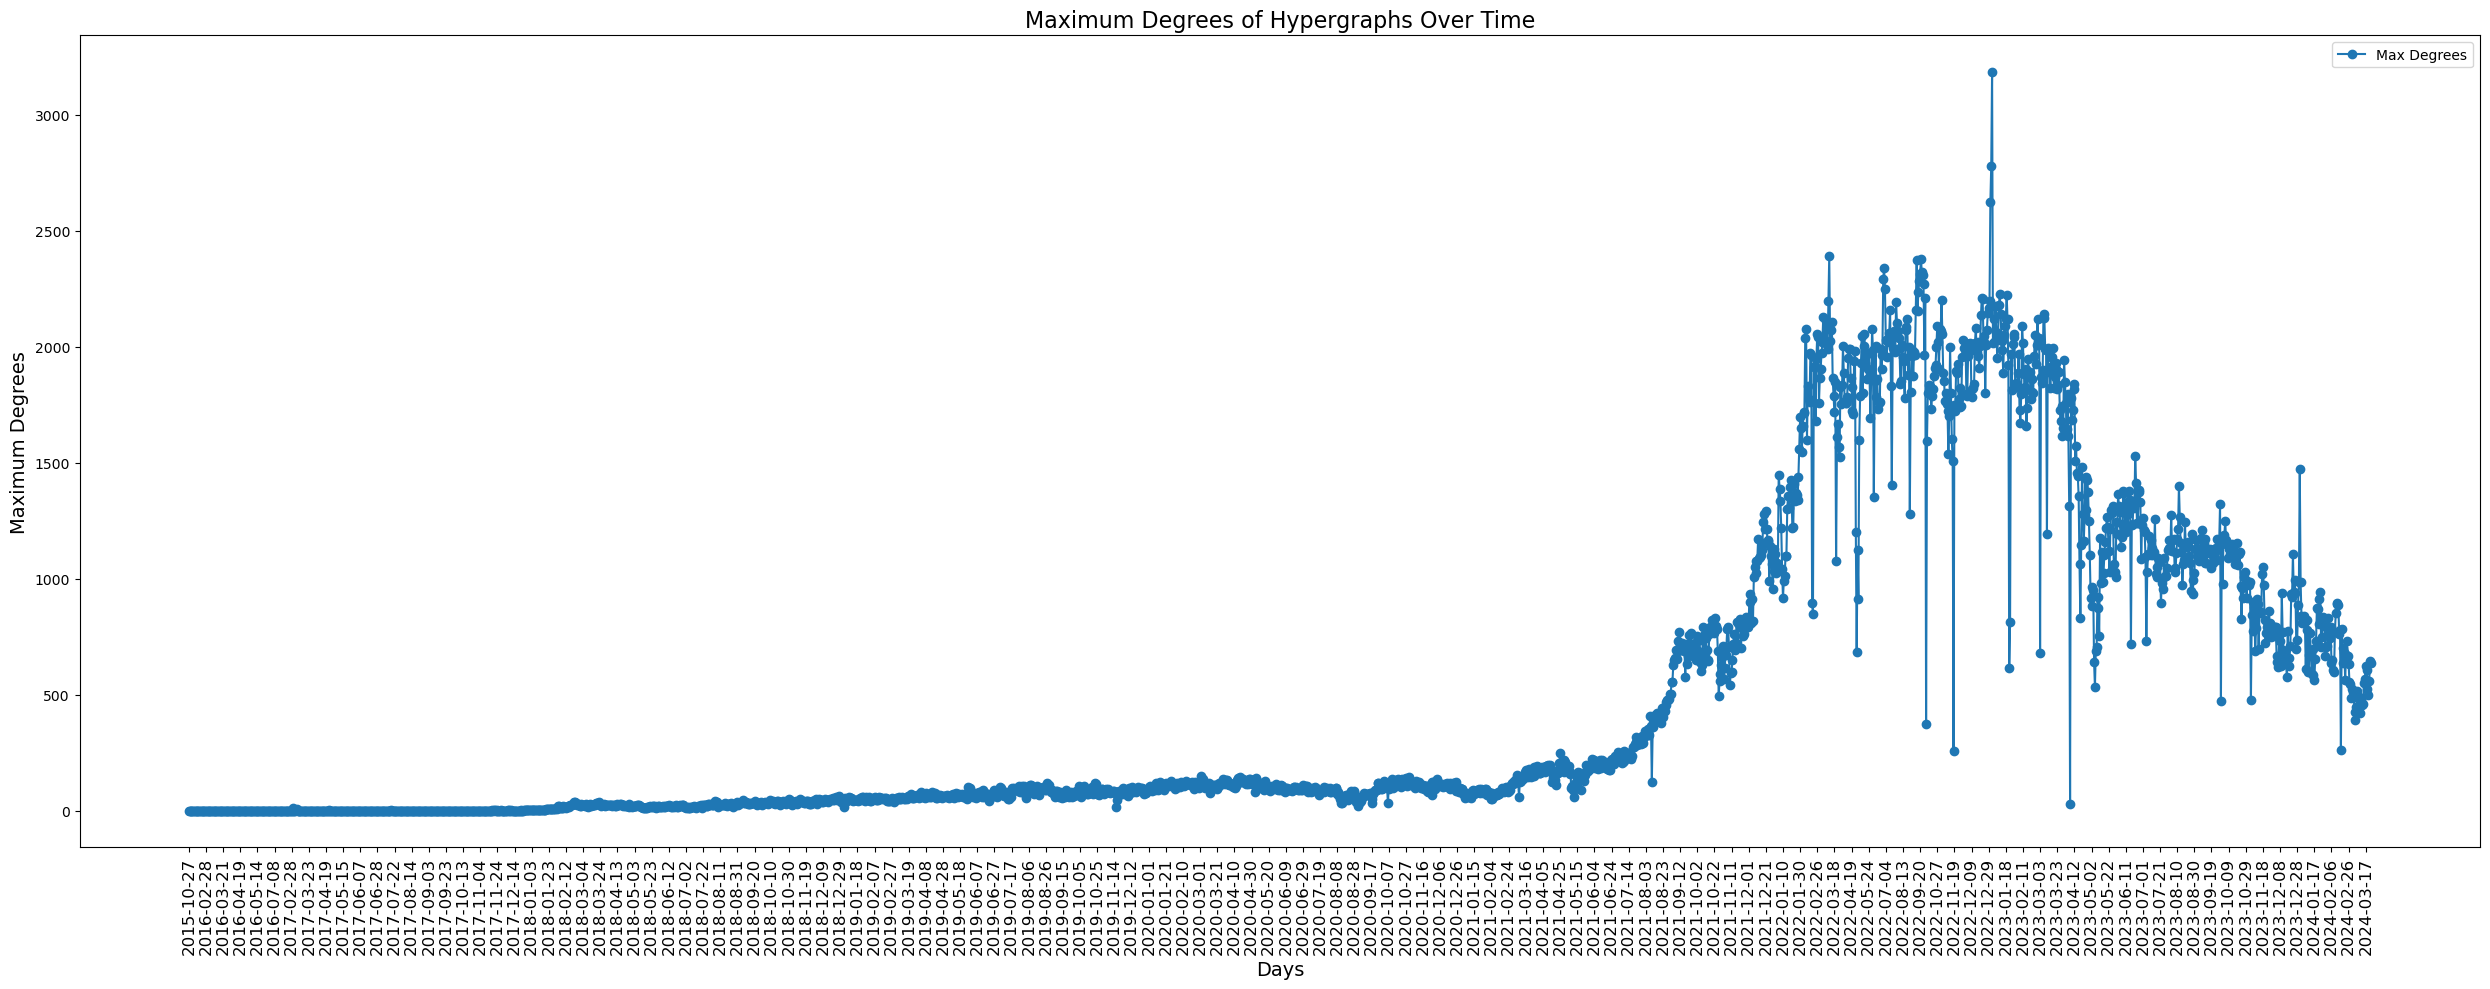

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
csv_file = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/max_degrees_per_day.csv'
df = pd.read_csv(csv_file)

# Extract the 'Date' and 'Maximum Degree' columns
days = df['Date'].astype(str).tolist()  # Convert to list of strings
degrees = df['Maximum Degree'].tolist()  # Convert to list of values

# Generate the plot with the specified settings
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), degrees, marker='o', linestyle='-', color='#1f77b4', label='Max Degrees')  # Brighter blue color

plt.xlabel('Days', fontsize=14)
plt.ylabel('Maximum Degrees', fontsize=14)
plt.title('Maximum Degrees of Hypergraphs Over Time', fontsize=16)

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx] for idx in selected_indices],  # Set corresponding day names as labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

plt.tight_layout()  # Adjust layout to fit labels

# Add a legend
plt.legend()

# Display the plot
plt.show()


### Log Scale

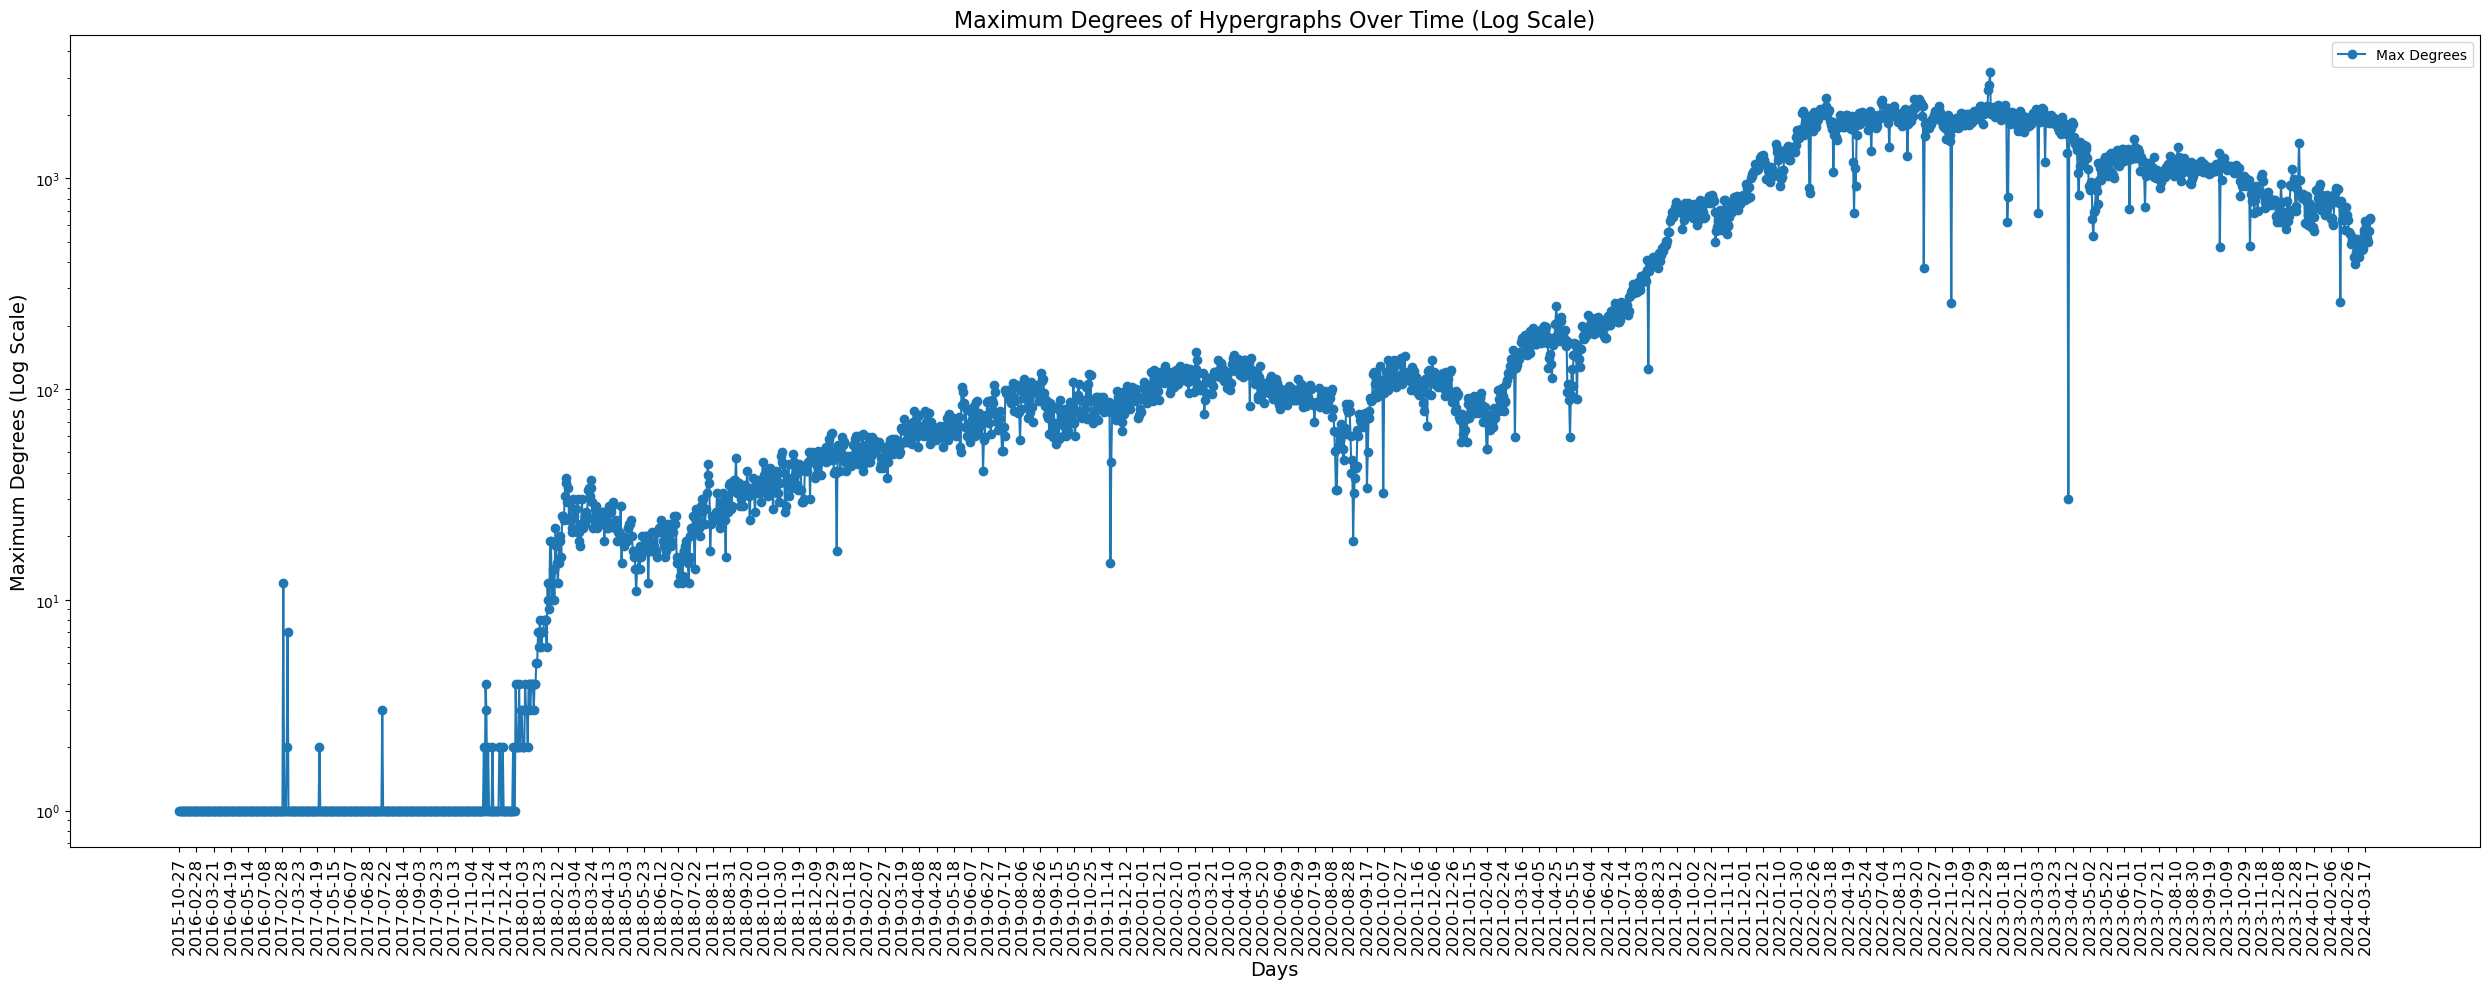

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
csv_file = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/max_degrees_per_day.csv'
df = pd.read_csv(csv_file)

# Extract the 'Date' and 'Maximum Degree' columns
days = df['Date'].astype(str).tolist()  # Convert to list of strings
degrees = df['Maximum Degree'].tolist()  # Convert to list of values

# Generate the plot with the specified settings
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), degrees, marker='o', linestyle='-', color='#1f77b4', label='Max Degrees')  # Brighter blue color

plt.xlabel('Days', fontsize=14)
plt.ylabel('Maximum Degrees (Log Scale)', fontsize=14)
plt.title('Maximum Degrees of Hypergraphs Over Time (Log Scale)', fontsize=16)

# Set y-axis to a logarithmic scale
plt.yscale('log')

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx] for idx in selected_indices],  # Set corresponding day names as labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

plt.tight_layout()  # Adjust layout to fit labels

# Add a legend
plt.legend()

# Display the plot
plt.show()


### Daywise nodes degree

In [6]:
import os
import json
from collections import defaultdict

# Define input and output directories
input_dir = '/home/prio/loc_project/Mini_2_ERC_721/hypergraph_everyday'
output_dir = '/home/prio/loc_project/Mini_2_ERC_721/degree_hypergraph_everyday'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each JSON file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.json'):
        # Extract the date from the filename (assuming format 'hypergraph_YYYY-MM-DD.json')
        date_str = filename.split('_')[1].split('.')[0]

        # Load the JSON data
        with open(os.path.join(input_dir, filename), 'r') as file:
            data = json.load(file)

        # Initialize a dictionary to store the degree of each node
        node_degrees = defaultdict(int)

        # Iterate over each hyperedge and its associated nodes
        for hyperedge, nodes in data.items():
            for node in nodes:
                node_degrees[node] += 1  # Increment the degree of the node

        # Convert the defaultdict to a regular dictionary
        node_degrees = dict(node_degrees)

        # Define the output file path with the date included
        output_file = os.path.join(output_dir, f'degree_{date_str}.json')

        # Save the node degrees to a JSON file
        with open(output_file, 'w') as file:
            json.dump(node_degrees, file, indent=4)

        print(f"Node degrees for {date_str} saved to {output_file}")


Node degrees for 2017-04-22 saved to /home/prio/loc_project/Mini_2_ERC_721/degree_hypergraph_everyday/degree_2017-04-22.json
Node degrees for 2020-04-20 saved to /home/prio/loc_project/Mini_2_ERC_721/degree_hypergraph_everyday/degree_2020-04-20.json
Node degrees for 2023-11-26 saved to /home/prio/loc_project/Mini_2_ERC_721/degree_hypergraph_everyday/degree_2023-11-26.json
Node degrees for 2018-07-12 saved to /home/prio/loc_project/Mini_2_ERC_721/degree_hypergraph_everyday/degree_2018-07-12.json
Node degrees for 2022-10-18 saved to /home/prio/loc_project/Mini_2_ERC_721/degree_hypergraph_everyday/degree_2022-10-18.json
Node degrees for 2018-03-20 saved to /home/prio/loc_project/Mini_2_ERC_721/degree_hypergraph_everyday/degree_2018-03-20.json
Node degrees for 2018-04-11 saved to /home/prio/loc_project/Mini_2_ERC_721/degree_hypergraph_everyday/degree_2018-04-11.json
Node degrees for 2021-10-06 saved to /home/prio/loc_project/Mini_2_ERC_721/degree_hypergraph_everyday/degree_2021-10-06.json


### Degree Centrality

In [2]:
import os
import json

# Define input and output directories
degree_dir = '/home/prio/loc_project/Mini_2_ERC_721/degree_hypergraph_everyday'
output_dir = '/home/prio/loc_project/Mini_2_ERC_721/degree_centrality_everyday'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each degree JSON file in the degree directory
for filename in os.listdir(degree_dir):
    if filename.endswith('.json'):
        # Extract the date from the filename (assuming format 'degree_YYYY-MM-DD.json')
        date_str = filename.split('_')[1].split('.')[0]

        # Load the degree JSON data
        with open(os.path.join(degree_dir, filename), 'r') as file:
            node_degrees = json.load(file)

        # Calculate the total number of nodes (max degree would be total nodes - 1)
        total_nodes = len(node_degrees)

        # Initialize a dictionary to store the degree centrality of each node
        node_centrality = {}

        try:
            # Calculate the degree centrality for each node
            for node, degree in node_degrees.items():
                node_centrality[node] = degree / (total_nodes - 1)
            
            # Define the output file path with the date included
            output_file = os.path.join(output_dir, f'degree_centrality_{date_str}.json')

            # Save the node centrality to a JSON file
            with open(output_file, 'w') as file:
                json.dump(node_centrality, file, indent=4)

            print(f"Degree centrality for {date_str} saved to {output_file}")

        except ZeroDivisionError:
            print(f"Error: Division by zero in file {filename}. Total nodes: {total_nodes}")


Degree centrality for 2022-12-14 saved to /home/prio/loc_project/Mini_2_ERC_721/degree_centrality_everyday/degree_centrality_2022-12-14.json
Degree centrality for 2022-04-04 saved to /home/prio/loc_project/Mini_2_ERC_721/degree_centrality_everyday/degree_centrality_2022-04-04.json
Degree centrality for 2021-11-28 saved to /home/prio/loc_project/Mini_2_ERC_721/degree_centrality_everyday/degree_centrality_2021-11-28.json
Degree centrality for 2021-11-03 saved to /home/prio/loc_project/Mini_2_ERC_721/degree_centrality_everyday/degree_centrality_2021-11-03.json
Degree centrality for 2021-05-12 saved to /home/prio/loc_project/Mini_2_ERC_721/degree_centrality_everyday/degree_centrality_2021-05-12.json
Degree centrality for 2016-05-14 saved to /home/prio/loc_project/Mini_2_ERC_721/degree_centrality_everyday/degree_centrality_2016-05-14.json
Degree centrality for 2017-11-02 saved to /home/prio/loc_project/Mini_2_ERC_721/degree_centrality_everyday/degree_centrality_2017-11-02.json
Degree centra

### Plot_Degree centrality

In [1]:
import os
import json
import matplotlib.pyplot as plt

# Directory containing the JSON files
input_dir = '/home/prio/loc_project/Mini_2_ERC_721/degree_centrality_everyday'
# Directory to save the plots
output_dir = '/home/prio/loc_project/Mini_2_ERC_721/degree_centrality_plots'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Get list of JSON files in the input directory
files = [f for f in os.listdir(input_dir) if f.endswith('.json')]

# Process each file
for file in files:
    # Construct full file path
    file_path = os.path.join(input_dir, file)
    
    # Load JSON data
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Extract date from filename (assuming filename format is 'degree_centrality_YYYY-MM-DD.json')
    date_str = file.replace('degree_centrality_', '').replace('.json', '')
    
    # Extract nodes and centrality values
    nodes = list(data.keys())
    centralities = list(data.values())
    
    # Generate line plot
    plt.figure(figsize=(25, 10))  # Adjust the figure size
    plt.plot(nodes, centralities, marker='o', linestyle='-', color='#1f77b4')
    plt.xlabel('Node', fontsize=14)
    plt.ylabel('Degree Centrality', fontsize=14)
    plt.title(f'Degree Centrality for {date_str}', fontsize=16)
    
    # Adjust x-axis ticks for clarity
    tick_interval = max(1, len(nodes) // 50)  # Label every nth node
    plt.xticks(
        ticks=range(0, len(nodes), tick_interval),  # Set ticks at intervals
        labels=[str(node) for node in nodes[::tick_interval]],  # Label only every nth node
        fontsize=10,  # Adjust font size for readability
        rotation=90  # Rotate labels for better readability
    )
    
    plt.grid(False)  # Optional: Add grid lines for better readability
    
    # Save the plot
    output_file = os.path.join(output_dir, f'degree_centrality_{date_str}.png')
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()
    
    # Print progress
    print(f'Processed and saved plot for {date_str}')

print('All plots have been generated and saved.')


Processed and saved plot for 2023-11-19
Processed and saved plot for 2020-11-24
Processed and saved plot for 2022-05-20
Processed and saved plot for 2017-10-31
Processed and saved plot for 2024-03-04
Processed and saved plot for 2020-08-04
Processed and saved plot for 2023-10-09
Processed and saved plot for 2018-05-27
Processed and saved plot for 2018-06-11
Processed and saved plot for 2023-03-07
Processed and saved plot for 2023-05-26
Processed and saved plot for 2021-04-08
Processed and saved plot for 2023-08-04
Processed and saved plot for 2024-03-08
Processed and saved plot for 2020-02-23
Processed and saved plot for 2019-12-04
Processed and saved plot for 2023-05-09
Processed and saved plot for 2019-04-19
Processed and saved plot for 2023-10-26
Processed and saved plot for 2019-01-11
Processed and saved plot for 2023-08-30
Processed and saved plot for 2023-01-02
Processed and saved plot for 2020-04-21
Processed and saved plot for 2021-10-15
Processed and saved plot for 2022-03-17


### Totel Token Vs Node

In [3]:
import json
import csv

# Define the input and output file paths
input_file = '/home/prio/loc_project/Mini_2_ERC_721/total_hypergraph.json'
output_file = '/home/prio/loc_project/Mini_2_ERC_721/total_hypergraph_token_number_of_nodes.csv'

# Load the JSON data
with open(input_file, 'r') as file:
    data = json.load(file)

# Prepare to write the CSV file
with open(output_file, 'w', newline='') as csvfile:
    fieldnames = ['Token', 'No. Of Nodes']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header
    writer.writeheader()

    # Write each token and its number of nodes
    for token, nodes in data.items():
        writer.writerow({'Token': token, 'No. Of Nodes': len(nodes)})

print(f"Data successfully written to {output_file}")


Data successfully written to /home/prio/loc_project/Mini_2_ERC_721/total_hypergraph_token_number_of_nodes.csv


### Plot_tokens Vs Nodes

   Token  No. Of Nodes
0      1             4
1      2           218
2      3             4
3      4             3
4      5             1
Range of tokens: 1 - 213637
Range of num_nodes: 1 - 694437


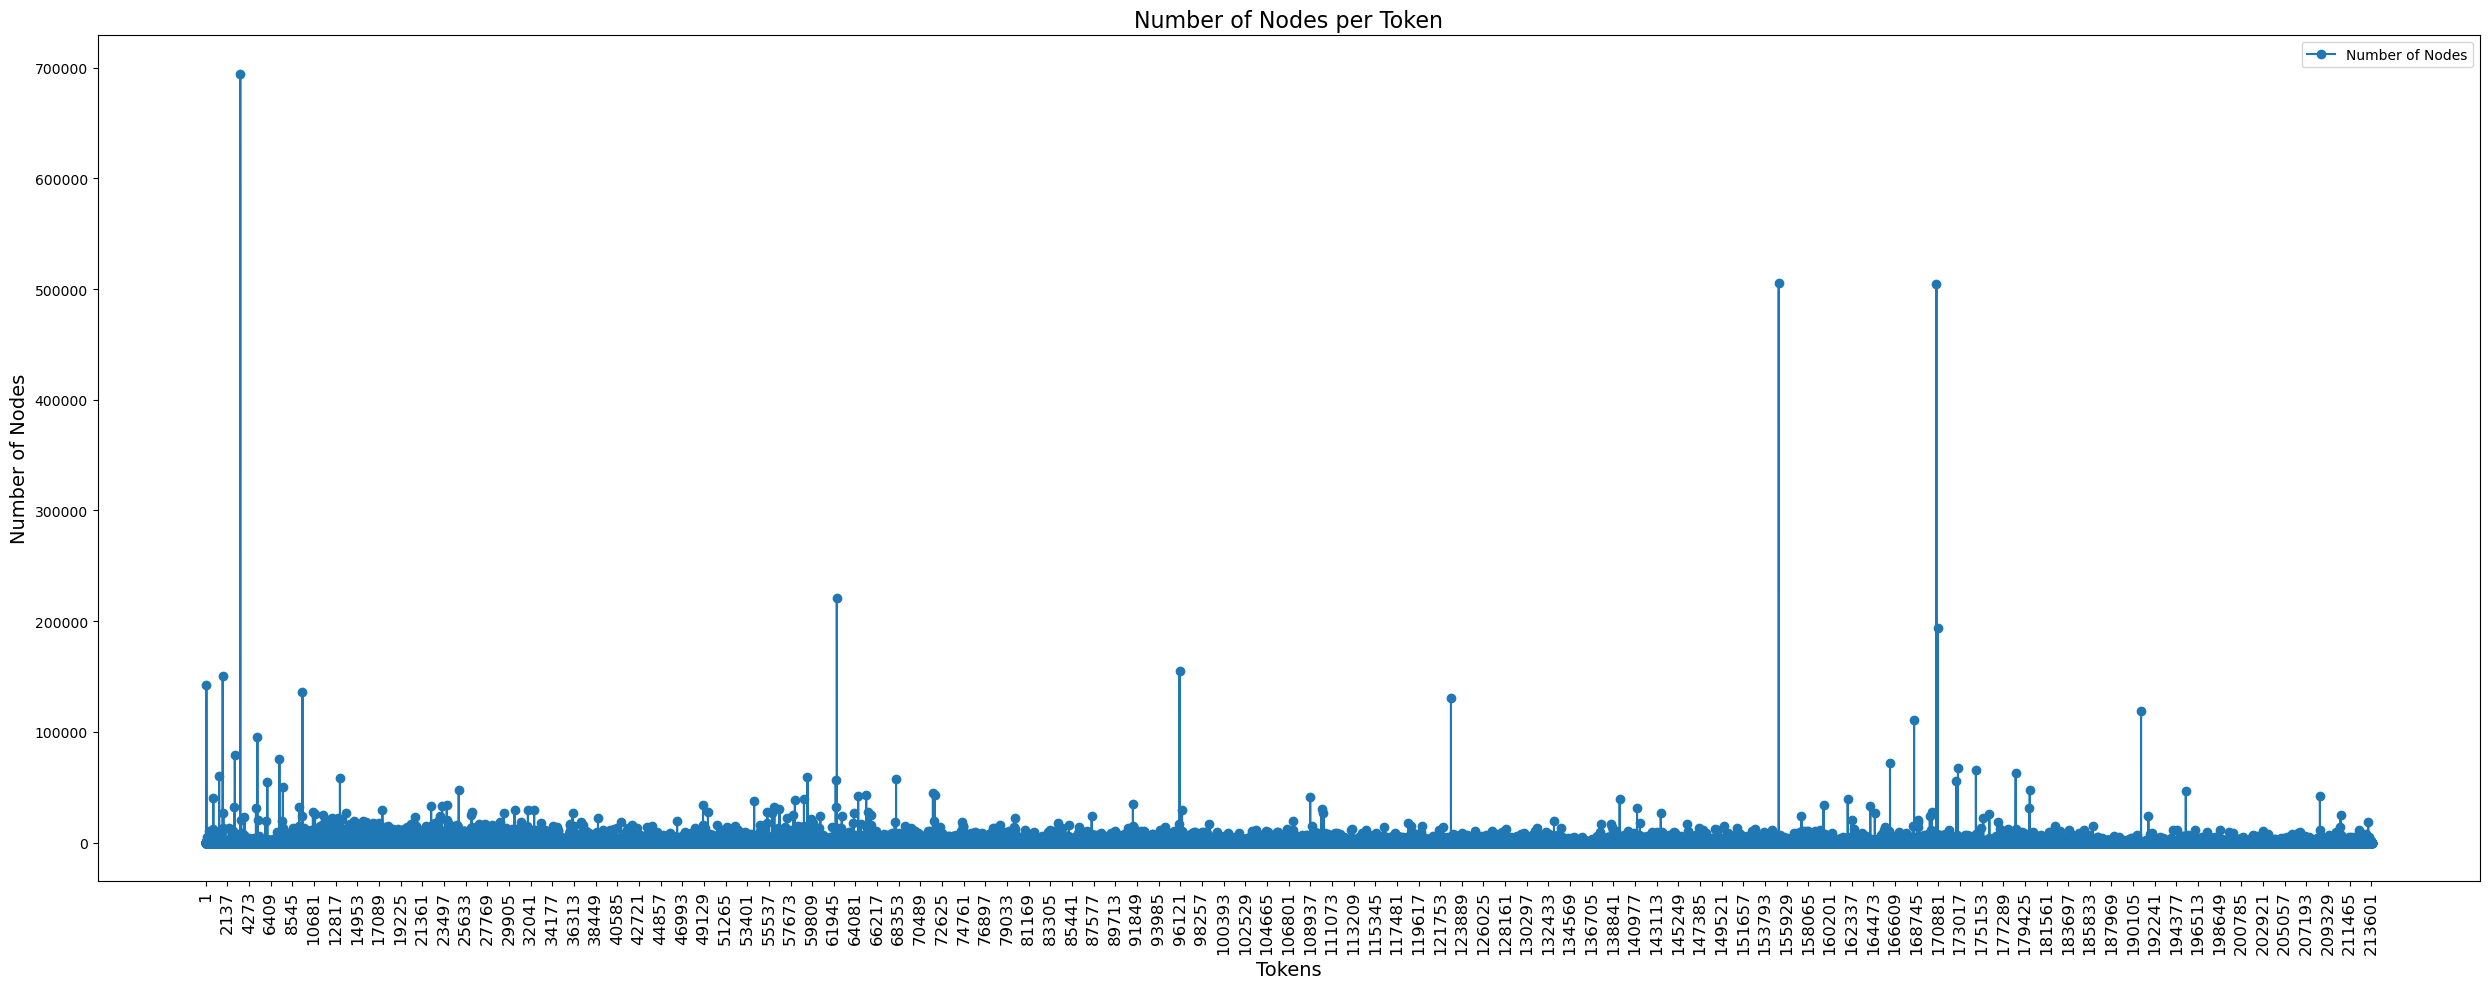

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# File path to the CSV file
csv_file = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/total_hypergraph_token_number_of_nodes.csv'

# Load the CSV data into a DataFrame
df = pd.read_csv(csv_file)

# Check the first few rows of the DataFrame to understand its structure
print(df.head())

# Ensure there are no NaN values in 'Token' or 'No. Of Nodes'
df = df.dropna(subset=['Token', 'No. Of Nodes'])

# Convert 'Token' to numeric if it's not already
df['Token'] = pd.to_numeric(df['Token'], errors='coerce')

# Sort DataFrame by tokens
df_sorted = df.sort_values('Token')

# Extract sorted data for plotting
tokens = df_sorted['Token'].values  # Convert to NumPy array
num_nodes = df_sorted['No. Of Nodes'].values  # Convert to NumPy array

# Check the ranges of values
print(f"Range of tokens: {tokens.min()} - {tokens.max()}")
print(f"Range of num_nodes: {num_nodes.min()} - {num_nodes.max()}")

# Generate the plot
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(tokens, num_nodes, marker='o', linestyle='-', color='#1f77b4', label='Number of Nodes')

plt.xlabel('Tokens', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)
plt.title('Number of Nodes per Token', fontsize=16)

# Selectively label x-axis ticks
tick_interval = max(1, len(tokens) // 100)  # Label every nth token
plt.xticks(
    ticks=tokens[::tick_interval],  # Set the ticks at every nth token
    labels=[str(int(token)) for token in tokens[::tick_interval]],  # Convert tokens to strings for labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

plt.tight_layout()  # Adjust layout to fit labels

# Optional: Add grid lines for better readability
plt.grid(False)

# Add a legend
plt.legend()

# Display the plot
plt.show()


### Log Scale

   Token  No. Of Nodes
0      1             4
1      2           218
2      3             4
3      4             3
4      5             1
Range of tokens: 1 - 213637
Range of num_nodes: 1 - 694437


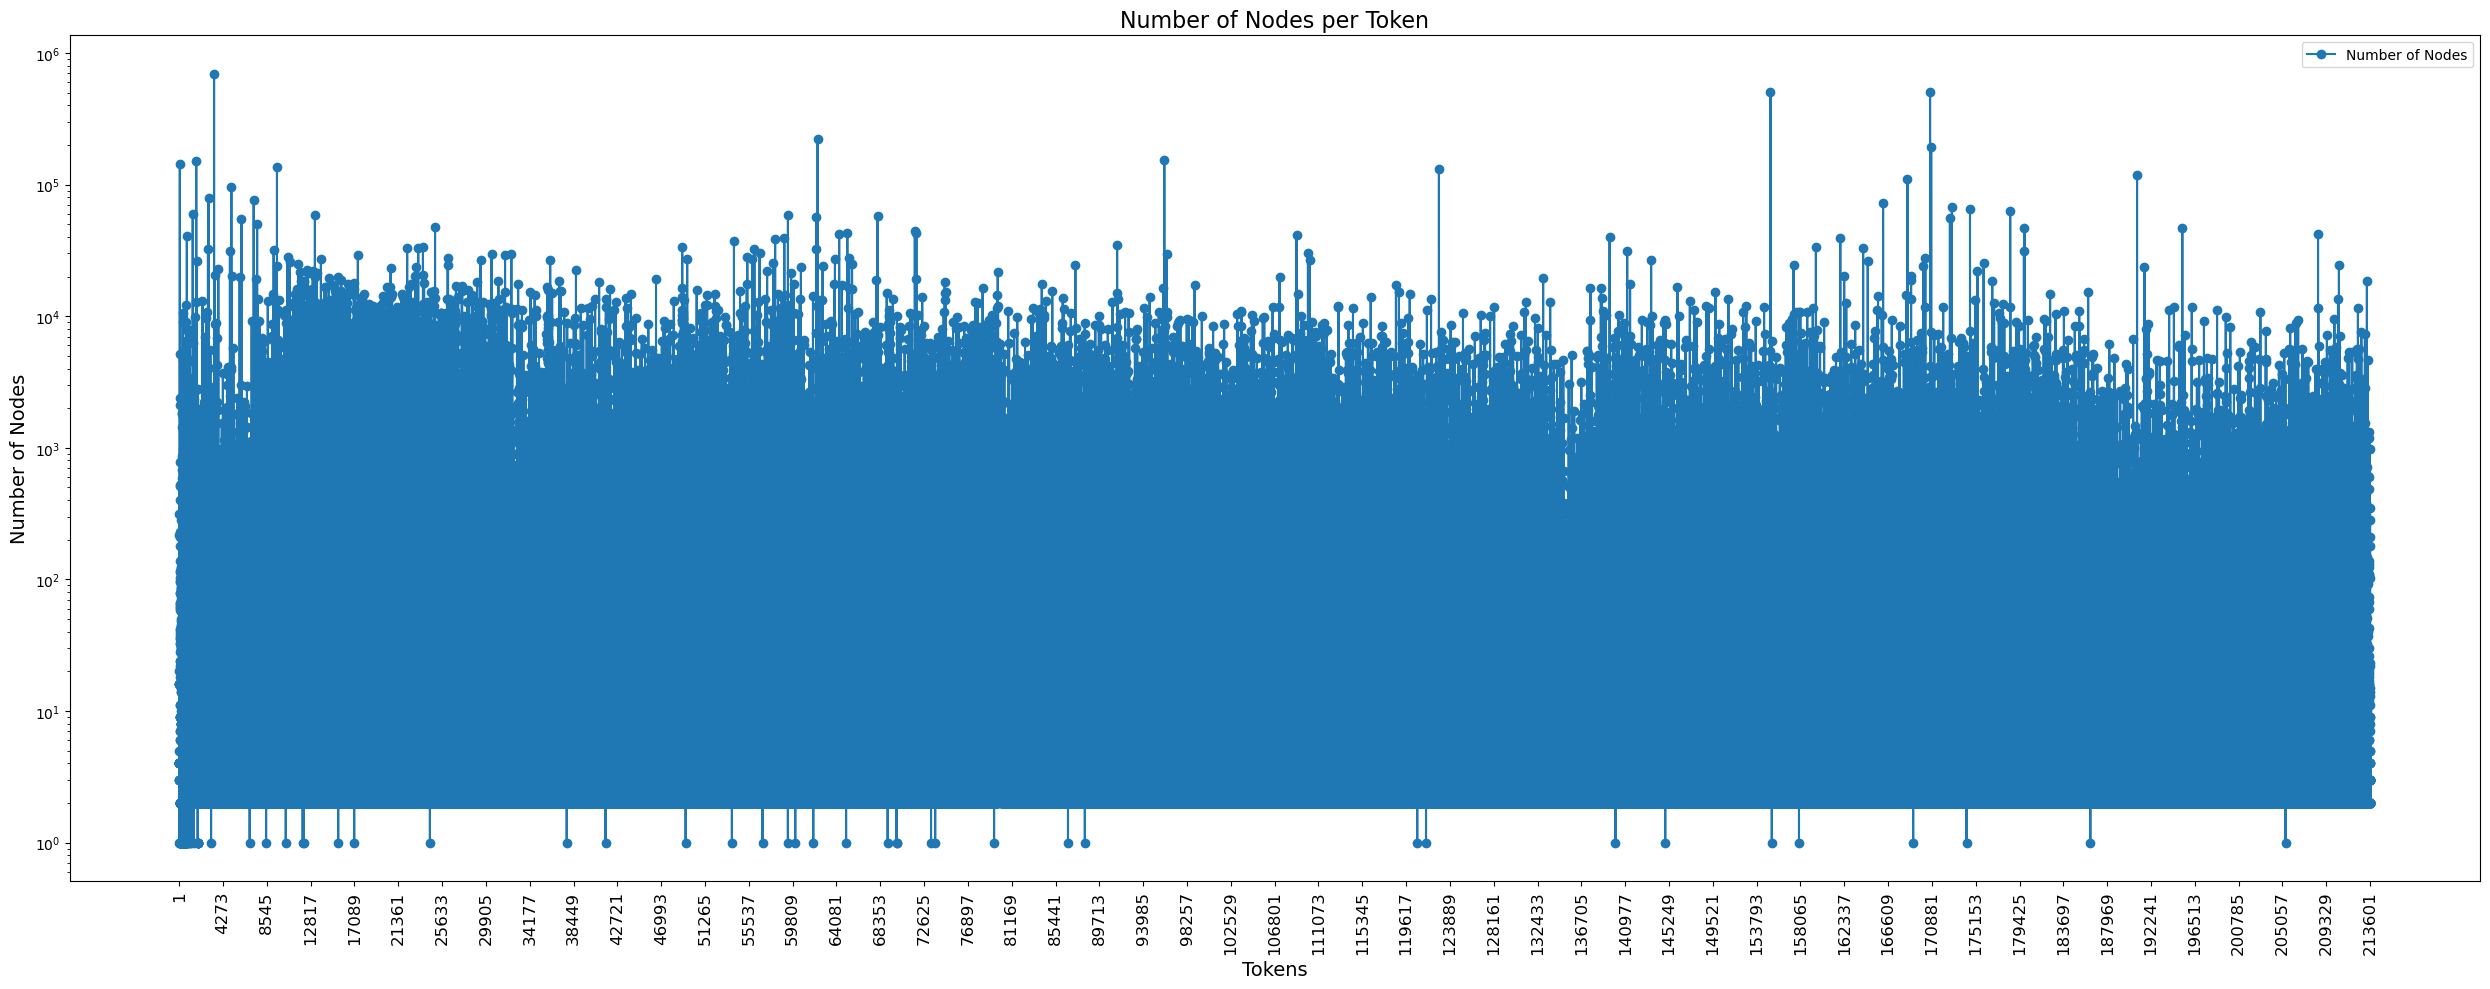

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# File path to the CSV file
csv_file = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/total_hypergraph_token_number_of_nodes.csv'

# Load the CSV data into a DataFrame
df = pd.read_csv(csv_file)

# Check the first few rows of the DataFrame to understand its structure
print(df.head())

# Ensure there are no NaN values in 'Token' or 'No. Of Nodes'
df = df.dropna(subset=['Token', 'No. Of Nodes'])

# Convert 'Token' to numeric if it's not already
df['Token'] = pd.to_numeric(df['Token'], errors='coerce')

# Sort DataFrame by tokens
df_sorted = df.sort_values('Token')

# Extract sorted data for plotting
tokens = df_sorted['Token'].values  # Convert to NumPy array
num_nodes = df_sorted['No. Of Nodes'].values  # Convert to NumPy array

# Check the ranges of values
print(f"Range of tokens: {tokens.min()} - {tokens.max()}")
print(f"Range of num_nodes: {num_nodes.min()} - {num_nodes.max()}")

# Generate the plot
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(tokens, num_nodes, marker='o', linestyle='-', color='#1f77b4', label='Number of Nodes')

plt.xlabel('Tokens', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)
plt.title('Number of Nodes per Token', fontsize=16)

# Set y-axis to log scale
plt.yscale('log')

# Selectively label x-axis ticks
tick_interval = max(1, len(tokens) // 50)  # Label every nth token
plt.xticks(
    ticks=tokens[::tick_interval],  # Set the ticks at every nth token
    labels=[str(int(token)) for token in tokens[::tick_interval]],  # Convert tokens to strings for labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

plt.tight_layout()  # Adjust layout to fit labels

# Optional: Add grid lines for better readability
plt.grid(False)

# Add a legend
plt.legend()

# Display the plot
plt.show()


### To contact and Is Contract

In [10]:
import pandas as pd
import glob
import os

# Directory containing CSV files
input_folder = '/home/prio/loc_project/Mini_2_ERC_721/labelling_out/'

# Pattern to match all CSV files
file_pattern = f'{input_folder}*.csv'

# Lists to collect DataFrames
list_df_from = []
list_df_to = []

# Iterate over each CSV file
for file_path in glob.glob(file_pattern):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Create the first DataFrame with 'fromLabel' and 'fromIsContract'
    df_from = df[['fromLabel', 'fromIsContract']]
    
    # Create the second DataFrame with 'toLabel' and 'toIsContract'
    df_to = df[['toLabel', 'toIsContract']]
    
    # Append the DataFrames to the lists
    list_df_from.append(df_from)
    list_df_to.append(df_to)

# Concatenate all DataFrames into single DataFrames
df_from_combined = pd.concat(list_df_from, ignore_index=True)
df_to_combined = pd.concat(list_df_to, ignore_index=True)

# Display the combined DataFrames
print("Combined 'from' DataFrame:")
print(df_from_combined)

print("\nCombined 'to' DataFrame:")
print(df_to_combined)


/tmp/ipykernel_92727/859888854.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_from_combined = pd.concat(list_df_from, ignore_index=True)


Combined 'from' DataFrame:
          fromLabel  fromIsContract
0            556857             0.0
1            572461             0.0
2               108             0.0
3            461888             1.0
4               108             0.0
...             ...             ...
190080631   7116470             0.0
190080632   2841900             0.0
190080633   1522710             0.0
190080634   6843125             1.0
190080635   7444141             0.0

[190080636 rows x 2 columns]

Combined 'to' DataFrame:
           toLabel  toIsContract
0           556099           0.0
1           572464           0.0
2           461888           1.0
3           461890           1.0
4           572465           0.0
...            ...           ...
190080631  6742867           0.0
190080632  5499370           0.0
190080633  6843125           1.0
190080634  5461272           0.0
190080635  1017488           0.0

[190080636 rows x 2 columns]


/tmp/ipykernel_92727/859888854.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_to_combined = pd.concat(list_df_to, ignore_index=True)


In [11]:
df_from_sorted = df_from_combined.sort_values(by='fromLabel')  
df_to_sorted = df_to_combined.sort_values(by='toLabel')      

In [12]:
df_fromm = df_from_sorted.drop_duplicates()
df_too = df_to_sorted.drop_duplicates()

In [13]:
# Create 'label' column in df_fromm and df_too
# Concatenate 'fromLabel' and 'toLabel' appropriately
df_fromm['label'] = df_fromm['fromLabel'].astype(str)  # Use only 'fromLabel' for df_fromm
df_too['label'] = df_too['toLabel'].astype(str)        # Use only 'toLabel' for df_too

# Create smart and nonsmart DataFrames from df_fromm
df_from_smart = df_fromm[df_fromm['fromIsContract'] == 1.0][['label']]
df_from_nonsmart = df_fromm[df_fromm['fromIsContract'] == 0.0][['label']]

# Create smart and nonsmart DataFrames from df_too
df_to_smart = df_too[df_too['toIsContract'] == 1.0][['label']]
df_to_nonsmart = df_too[df_too['toIsContract'] == 0.0][['label']]

# Merge smart and nonsmart DataFrames
df_smart_combined = pd.concat([df_from_smart, df_to_smart], ignore_index=True)
df_nonsmart_combined = pd.concat([df_from_nonsmart, df_to_nonsmart], ignore_index=True)

# Remove duplicates from the combined DataFrames
df_smart_combined_unique = df_smart_combined.drop_duplicates()
df_nonsmart_combined_unique = df_nonsmart_combined.drop_duplicates()

# Display the combined and deduplicated DataFrames
print("Combined and deduplicated 'smart' DataFrame:")
print(df_smart_combined_unique)

print("\nCombined and deduplicated 'nonsmart' DataFrame:")
print(df_nonsmart_combined_unique)

/tmp/ipykernel_92727/384446702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fromm['label'] = df_fromm['fromLabel'].astype(str)  # Use only 'fromLabel' for df_fromm
/tmp/ipykernel_92727/384446702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_too['label'] = df_too['toLabel'].astype(str)        # Use only 'toLabel' for df_too


Combined and deduplicated 'smart' DataFrame:
          label
0             2
1             6
2            27
3            32
4           102
...         ...
509884  7910568
509885  7910576
509886  7910642
509887  7910646
509888  7911024

[289608 rows x 1 columns]

Combined and deduplicated 'nonsmart' DataFrame:
            label
0               1
1               4
2               5
3               7
4               9
...           ...
10705740  7911023
10705741  7911025
10705742  7911026
10705743  7911027
10705744  7911028

[7626773 rows x 1 columns]


In [14]:
import pandas as pd

# Assuming df_smart_combined_unique and df_nonsmart_combined_unique are already defined
# Extract the 'label' columns
labels_smart = df_smart_combined_unique['label']
labels_nonsmart = df_nonsmart_combined_unique['label']

# Find the intersection of the labels
intersection_labels = pd.Series(list(set(labels_smart).intersection(set(labels_nonsmart))))

# Create a DataFrame with the intersecting labels
df_intersection = pd.DataFrame(intersection_labels, columns=['label'])

# Display the DataFrame with intersecting labels
print("Intersection of 'smart' and 'nonsmart' labels:")
print(df_intersection)



Intersection of 'smart' and 'nonsmart' labels:
        label
0     7551349
1     7580555
2     7448663
3     7541848
4     7866760
...       ...
5357  7463113
5358  7805137
5359  7553260
5360  7550587
5361  7807735

[5362 rows x 1 columns]


In [15]:
num_rows = df_intersection.shape[0]
print(f"Number of rows in both: {num_rows}")

num_rows = df_smart_combined_unique.shape[0]
print(f"Number of Smart: {num_rows}")

num_rows = df_nonsmart_combined_unique.shape[0]
print(f"Number of Non Smart: {num_rows}")

Number of rows in both: 5362
Number of Smart: 289608
Number of Non Smart: 7626773


In [8]:
import json

# Path to the JSON file
json_file_path = '/home/prio/loc_project/Mini_2_ERC_721/from_to_dict.json'

# Load the JSON file into a dictionary
with open(json_file_path, 'r') as file:
    data = json.load(file)

# List of values to search for
search_values = [7506671, 7777616, 27, 32, 7, 9]

# Dictionary to store the results
matching_keys = {value: [] for value in search_values}

# Find the keys for each specified value
for key, value in data.items():
    if value in search_values:
        matching_keys[value].append(key)

# Display the results
for value, keys in matching_keys.items():
    if keys:
        print(f"Keys with value {value}:")
        for key in keys:
            print(key)
    else:
        print(f"No key found with value {value}.")


Keys with value 7506671:
0x6bca07720903b225c31d9b00d5f3862572722809
Keys with value 7777616:
0x51886fb39f4a88d3e6c2d9e121387b543262f5c8
Keys with value 27:
0x61f9bc2fc2dad0f5bb1b872d72c2cd8ff283ec4c
Keys with value 32:
0xd2f1f8d517263b023482ce4fbebc944ffa22a1d0
Keys with value 7:
0x9d897d8871a7a6fd16fb76a3bea34802ba5ccd83
Keys with value 9:
0x9ac937835f6a06657441ac77788b72e3bddf2ae1


In [9]:
import pandas as pd
import json

# Path to the JSON file
json_file_path = '/home/prio/loc_project/Mini_2_ERC_721/from_to_dict.json'

# Load the JSON file into a dictionary
with open(json_file_path, 'r') as file:
    data = json.load(file)

results = []

# Search each label from df_intersection in the JSON data
for label in df_intersection['label']:
    # Find keys where the value matches the label
    matching_keys = [key for key, value in data.items() if value == label]
    
    # Add the matching keys to the result list
    for key in matching_keys:
        results.append({'wallet address': key})

# Create a DataFrame with the results
df_results = pd.DataFrame(results)

# Save the DataFrame to a CSV file
output_csv_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/intersecting_labels.csv'
df_results.to_csv(output_csv_path, index=False)

print(f"Results saved to {output_csv_path}")


Results saved to /home/prio/loc_project/Mini_2_ERC_721/csv_data/intersecting_labels.csv


In [9]:
import pandas as pd
import glob
import os

# Directory containing CSV files
input_folder = '/home/prio/loc_project/Data/'

# Pattern to match all CSV files
file_pattern = os.path.join(input_folder, '*.csv')

# List of values to search for
search_values = [
    '0x6bca07720903b225c31d9b00d5f3862572722809',
    '0x51886fb39f4a88d3e6c2d9e121387b543262f5c8',
    '0x61f9bc2fc2dad0f5bb1b872d72c2cd8ff283ec4c',
    '0xd2f1f8d517263b023482ce4fbebc944ffa22a1d0',
    '0x9d897d8871a7a6fd16fb76a3bea34802ba5ccd83',
    '0x9ac937835f6a06657441ac77788b72e3bddf2ae1'
]

# File to save the results
output_file = 'verification.txt'

# List to store results
results = []

# Get a list of all files
file_paths = glob.glob(file_pattern)
total_files = len(file_paths)

# Set the starting index to skip files
start_index = 0  # File 20 is index 19

# Ensure we don't start beyond the total number of files
if start_index >= total_files:
    print("Starting index is beyond the total number of files.")
else:
    # Iterate over each CSV file starting from the 20th file
    for i, file_path in enumerate(file_paths[start_index:], start=start_index + 1):
        # Print the current file and progress
        print(f"Processing file {i}/{total_files}: {file_path}")
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Check if 'from' or 'to' column contains the search value
        if 'from' in df.columns and 'to' in df.columns:
            # Find rows where 'from' or 'to' column contains any of the search values
            matching_rows = df[df['from'].isin(search_values) | df['to'].isin(search_values)]
            
            # If there are matching rows, add the file and the rows to the results
            if not matching_rows.empty:
                results.append({
                    'file': file_path,
                    'matching_rows': matching_rows
                })

# Save the results to the output file
with open(output_file, 'w') as outfile:
    if results:
        for result in results:
            outfile.write(f"\nFile: {result['file']}\n")
            outfile.write("Matching Rows:\n")
            outfile.write(result['matching_rows'].to_string())
            outfile.write("\n")
    else:
        outfile.write(f"No matching records found for the specified values: {', '.join(search_values)}.\n")

# Print the result summary
if results:
    print(f"Results saved to {output_file}.")
else:
    print(f"No matching records found. Results saved to {output_file}.")


Processing file 1/39: /home/prio/loc_project/Data/17000000to17249999_ERC721Transaction.csv
Processing file 2/39: /home/prio/loc_project/Data/19000000to19249999_ERC721Transaction.csv


/tmp/ipykernel_305934/2939116369.py:44: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Processing file 3/39: /home/prio/loc_project/Data/17250000to17499999_ERC721Transaction.csv
Processing file 4/39: /home/prio/loc_project/Data/18000000to18249999_ERC721Transaction.csv
Processing file 5/39: /home/prio/loc_project/Data/11000000to11999999_ERC721Transaction.csv
Processing file 6/39: /home/prio/loc_project/Data/18250000to18499999_ERC721Transaction.csv
Processing file 7/39: /home/prio/loc_project/Data/13500000to13749999_ERC721Transaction.csv
Processing file 8/39: /home/prio/loc_project/Data/16250000to16499999_ERC721Transaction.csv
Processing file 9/39: /home/prio/loc_project/Data/14750000to14999999_ERC721Transaction.csv
Processing file 10/39: /home/prio/loc_project/Data/13250000to13499999_ERC721Transaction.csv
Processing file 11/39: /home/prio/loc_project/Data/14250000to14499999_ERC721Transaction.csv
Processing file 12/39: /home/prio/loc_project/Data/9000000to9999999_ERC721Transaction.csv
Processing file 13/39: /home/prio/loc_project/Data/14000000to14249999_ERC721Transaction.c

/tmp/ipykernel_305934/2939116369.py:44: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Processing file 36/39: /home/prio/loc_project/Data/15500000to15749999_ERC721Transaction.csv
Processing file 37/39: /home/prio/loc_project/Data/4000000to4999999_ERC721Transaction.csv


/tmp/ipykernel_305934/2939116369.py:44: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Processing file 38/39: /home/prio/loc_project/Data/19250000to19499999_ERC721Transaction.csv
Processing file 39/39: /home/prio/loc_project/Data/7000000to7999999_ERC721Transaction.csv
Results saved to verification.txt.


### On which days token occuring

In [12]:
import os
import json

# Directory containing the JSON files
directory = '/home/prio/loc_project/Mini_2_ERC_721/degree_hypergraph_everyday'

# Key to search for
search_key = "2"

# List to store the filenames where the key is found
days_with_key = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        file_path = os.path.join(directory, filename)
        try:
            # Open and load the JSON data
            with open(file_path, 'r') as file:
                data = json.load(file)
                
                # Check if the key is in the JSON data
                if search_key in data:
                    days_with_key.append(filename)  # Store the filename (which includes the date)
        except json.JSONDecodeError:
            print(f"Error decoding JSON from file: {filename}")

# Print the days when the key is present
print(f"Days with key '{search_key}':")
for day in days_with_key:
    print(day)


Days with key '2':
degree_2015-10-27.json


In [4]:
import json

# Define the file path
json_file_path = '/home/prio/loc_project/Mini_2_ERC_721/n-hypergraph/n_hypergraph_count.json'

# Load the JSON data
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Initialize a set to keep track of unique keys
unique_keys = set()

# Iterate over the data to collect all unique keys
for date in data:
    for key in data[date].keys():
        unique_keys.add(int(key))  # Convert keys to integers for proper sorting

# Sort the unique keys
sorted_keys = sorted(unique_keys)

# Output the sorted unique keys
print("Sorted unique keys:", sorted_keys)

# Output the total number of unique keys
print(f"The number of unique keys is: {len(sorted_keys)}")


Sorted unique keys: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 21

In [5]:
import json
from collections import defaultdict

# Define the file path
json_file_path = '/home/prio/loc_project/Mini_2_ERC_721/n-hypergraph/n_hypergraph_count.json'

# Load the JSON data
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Initialize a dictionary to keep track of the count for each unique key
key_counts = defaultdict(int)

# Iterate over the data to collect all keys and their counts
for date in data:
    for key, count in data[date].items():
        key_counts[int(key)] += count  # Convert keys to integers and accumulate their counts

# Sort the unique keys
sorted_keys = sorted(key_counts.keys())

# Output the sorted unique keys and their counts
for key in sorted_keys:
    print(f"Key {key}: Total Count {key_counts[key]}")

# Output the total number of unique keys
print(f"\nThe number of unique keys is: {len(sorted_keys)}")


Key 1: Total Count 2773
Key 2: Total Count 1378398
Key 3: Total Count 405097
Key 4: Total Count 308231
Key 5: Total Count 142440
Key 6: Total Count 141594
Key 7: Total Count 90068
Key 8: Total Count 84959
Key 9: Total Count 63172
Key 10: Total Count 58412
Key 11: Total Count 47595
Key 12: Total Count 43310
Key 13: Total Count 36425
Key 14: Total Count 33510
Key 15: Total Count 28890
Key 16: Total Count 26947
Key 17: Total Count 23779
Key 18: Total Count 21943
Key 19: Total Count 19579
Key 20: Total Count 18351
Key 21: Total Count 16902
Key 22: Total Count 15745
Key 23: Total Count 14265
Key 24: Total Count 13529
Key 25: Total Count 12369
Key 26: Total Count 11761
Key 27: Total Count 10727
Key 28: Total Count 10217
Key 29: Total Count 9732
Key 30: Total Count 8845
Key 31: Total Count 8402
Key 32: Total Count 7866
Key 33: Total Count 7624
Key 34: Total Count 7125
Key 35: Total Count 6813
Key 36: Total Count 6505
Key 37: Total Count 6194
Key 38: Total Count 6028
Key 39: Total Count 5553
K

In [6]:
import json
from collections import defaultdict

# Define the file path
json_file_path = '/home/prio/loc_project/Mini_2_ERC_721/n-hypergraph/n_hypergraph_count.json'

# Load the JSON data
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Initialize a dictionary to keep track of the count for each unique key
key_counts = defaultdict(int)

# Define the key to search for
target_key = 1

# Track where the target key is found
locations = []

# Iterate over the data to collect all keys and their counts
for date in data:
    for key, count in data[date].items():
        key = int(key)  # Convert keys to integers
        key_counts[key] += count
        if key == target_key:
            locations.append(date)

# Sort the unique keys
sorted_keys = sorted(key_counts.keys())

# Output the sorted unique keys and their counts
for key in sorted_keys:
    print(f"Key {key}: Total Count {key_counts[key]}")

# Output the total number of unique keys
print(f"\nThe number of unique keys is: {len(sorted_keys)}")

# Check if the target key was found and print its locations
if locations:
    print(f"\nKey {target_key} is found in the following dates:")
    for date in locations:
        print(f" - {date}: Count {data[date][str(target_key)]}")
else:
    print(f"\nKey {target_key} is not found in the dataset.")

# Key 1 is found in the following dates:
#  - 2016-10-26
# timestamp,fromLabel,toLabel,tokenAddressLabel,fromIsContract,toIsContract
# 2016-10-26 11:17:56,214,214,5,0,0

Key 1: Total Count 2773
Key 2: Total Count 1378398
Key 3: Total Count 405097
Key 4: Total Count 308231
Key 5: Total Count 142440
Key 6: Total Count 141594
Key 7: Total Count 90068
Key 8: Total Count 84959
Key 9: Total Count 63172
Key 10: Total Count 58412
Key 11: Total Count 47595
Key 12: Total Count 43310
Key 13: Total Count 36425
Key 14: Total Count 33510
Key 15: Total Count 28890
Key 16: Total Count 26947
Key 17: Total Count 23779
Key 18: Total Count 21943
Key 19: Total Count 19579
Key 20: Total Count 18351
Key 21: Total Count 16902
Key 22: Total Count 15745
Key 23: Total Count 14265
Key 24: Total Count 13529
Key 25: Total Count 12369
Key 26: Total Count 11761
Key 27: Total Count 10727
Key 28: Total Count 10217
Key 29: Total Count 9732
Key 30: Total Count 8845
Key 31: Total Count 8402
Key 32: Total Count 7866
Key 33: Total Count 7624
Key 34: Total Count 7125
Key 35: Total Count 6813
Key 36: Total Count 6505
Key 37: Total Count 6194
Key 38: Total Count 6028
Key 39: Total Count 5553
K

### Not worked

In [8]:
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import defaultdict

# Define the file path for the input JSON
json_file_path = '/home/prio/loc_project/Mini_2_ERC_721/n-hypergraph/n_hypergraph_count.json'

# Define the output file path for the saved graph
output_graph_path = '/home/prio/loc_project/Mini_2_ERC_721/n-hypergraph/keys_variation_over_time.png'

# Load the JSON data
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Initialize a dictionary to store the datewise counts for each key
datewise_counts = defaultdict(lambda: defaultdict(int))

# Iterate over the data to populate the datewise counts
for date in data:
    for key, count in data[date].items():
        datewise_counts[int(key)][date] = count

# Prepare the date range (sorted) for the x-axis
dates = sorted(data.keys())

# Prepare the y-values for each key (fill with 0 if the key is missing on some dates)
keys = sorted(datewise_counts.keys())
counts_over_time = {key: [datewise_counts[key][date] for date in dates] for key in keys}

# Plotting
plt.figure(figsize=(15, 8))

# Use a color spectrum for each key
colors = cm.viridis(np.linspace(0, 1, len(keys)))

for idx, key in enumerate(keys):
    plt.plot(dates, counts_over_time[key], label=f'Key {key}', color=colors[idx])

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Variation of Key Counts Over Time')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

# Save the plot to a file
plt.savefig(output_graph_path, dpi=300)

# Optionally, you can also display the plot
plt.show()


# 1-Hypergraph and 2-hypergraph

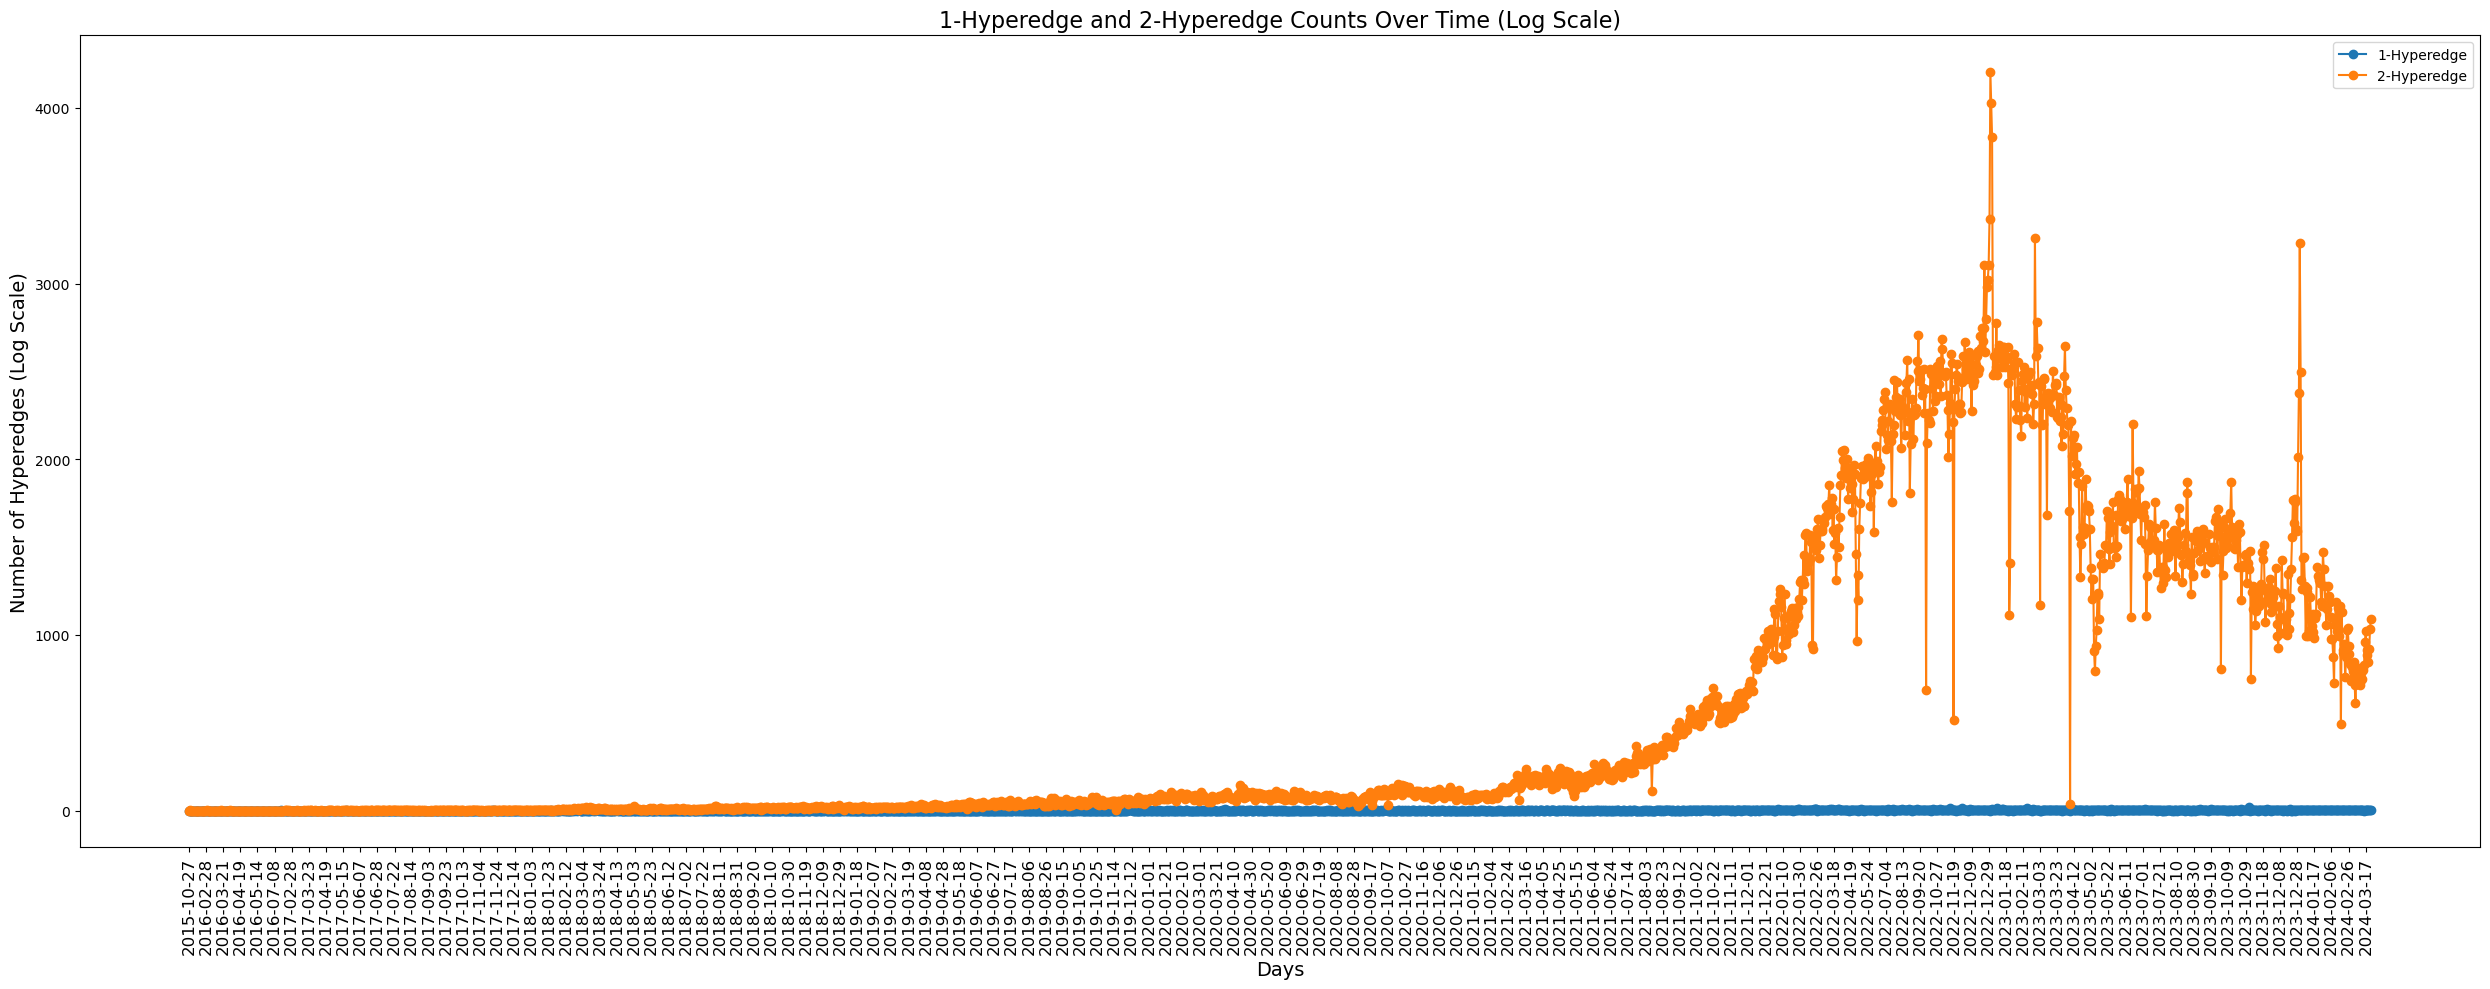

In [9]:
import json
import matplotlib.pyplot as plt
import datetime

# Load the JSON data from the file
with open('/home/prio/loc_project/Mini_2_ERC_721/n-hypergraph/n_hypergraph_count.json', 'r') as file:
    data = json.load(file)

# Convert the dates to a sorted list
dates = sorted(data.keys(), key=lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

# Initialize lists to store the number of 1-hyperedges and 2-hyperedges over time
one_hyperedges = []
two_hyperedges = []

# Extract the count for 1-hyperedges and 2-hyperedges
for date in dates:
    one_hyperedges.append(data[date].get("1", 0))  # Default to 0 if "1" is not present
    two_hyperedges.append(data[date].get("2", 0))  # Default to 0 if "2" is not present

# Generate the plot with the specified settings
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability

# Plot for 1-hyperedges
plt.plot(range(len(dates)), one_hyperedges, marker='o', linestyle='-', color='#1f77b4', label='1-Hyperedge')

# Plot for 2-hyperedges
plt.plot(range(len(dates)), two_hyperedges, marker='o', linestyle='-', color='#ff7f0e', label='2-Hyperedge')

# Add labels and title
plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of Hyperedges (Log Scale)', fontsize=14)
plt.title('1-Hyperedge and 2-Hyperedge Counts Over Time (Log Scale)', fontsize=16)

# Set y-axis to a logarithmic scale
# plt.yscale('log')
# 
# Selectively label x-axis ticks
selected_indices = list(range(0, len(dates), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[dates[idx] for idx in selected_indices],  # Set corresponding day names as labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

plt.tight_layout()  # Adjust layout to fit labels

# Add a legend
plt.legend()

# Display the plot
plt.show()


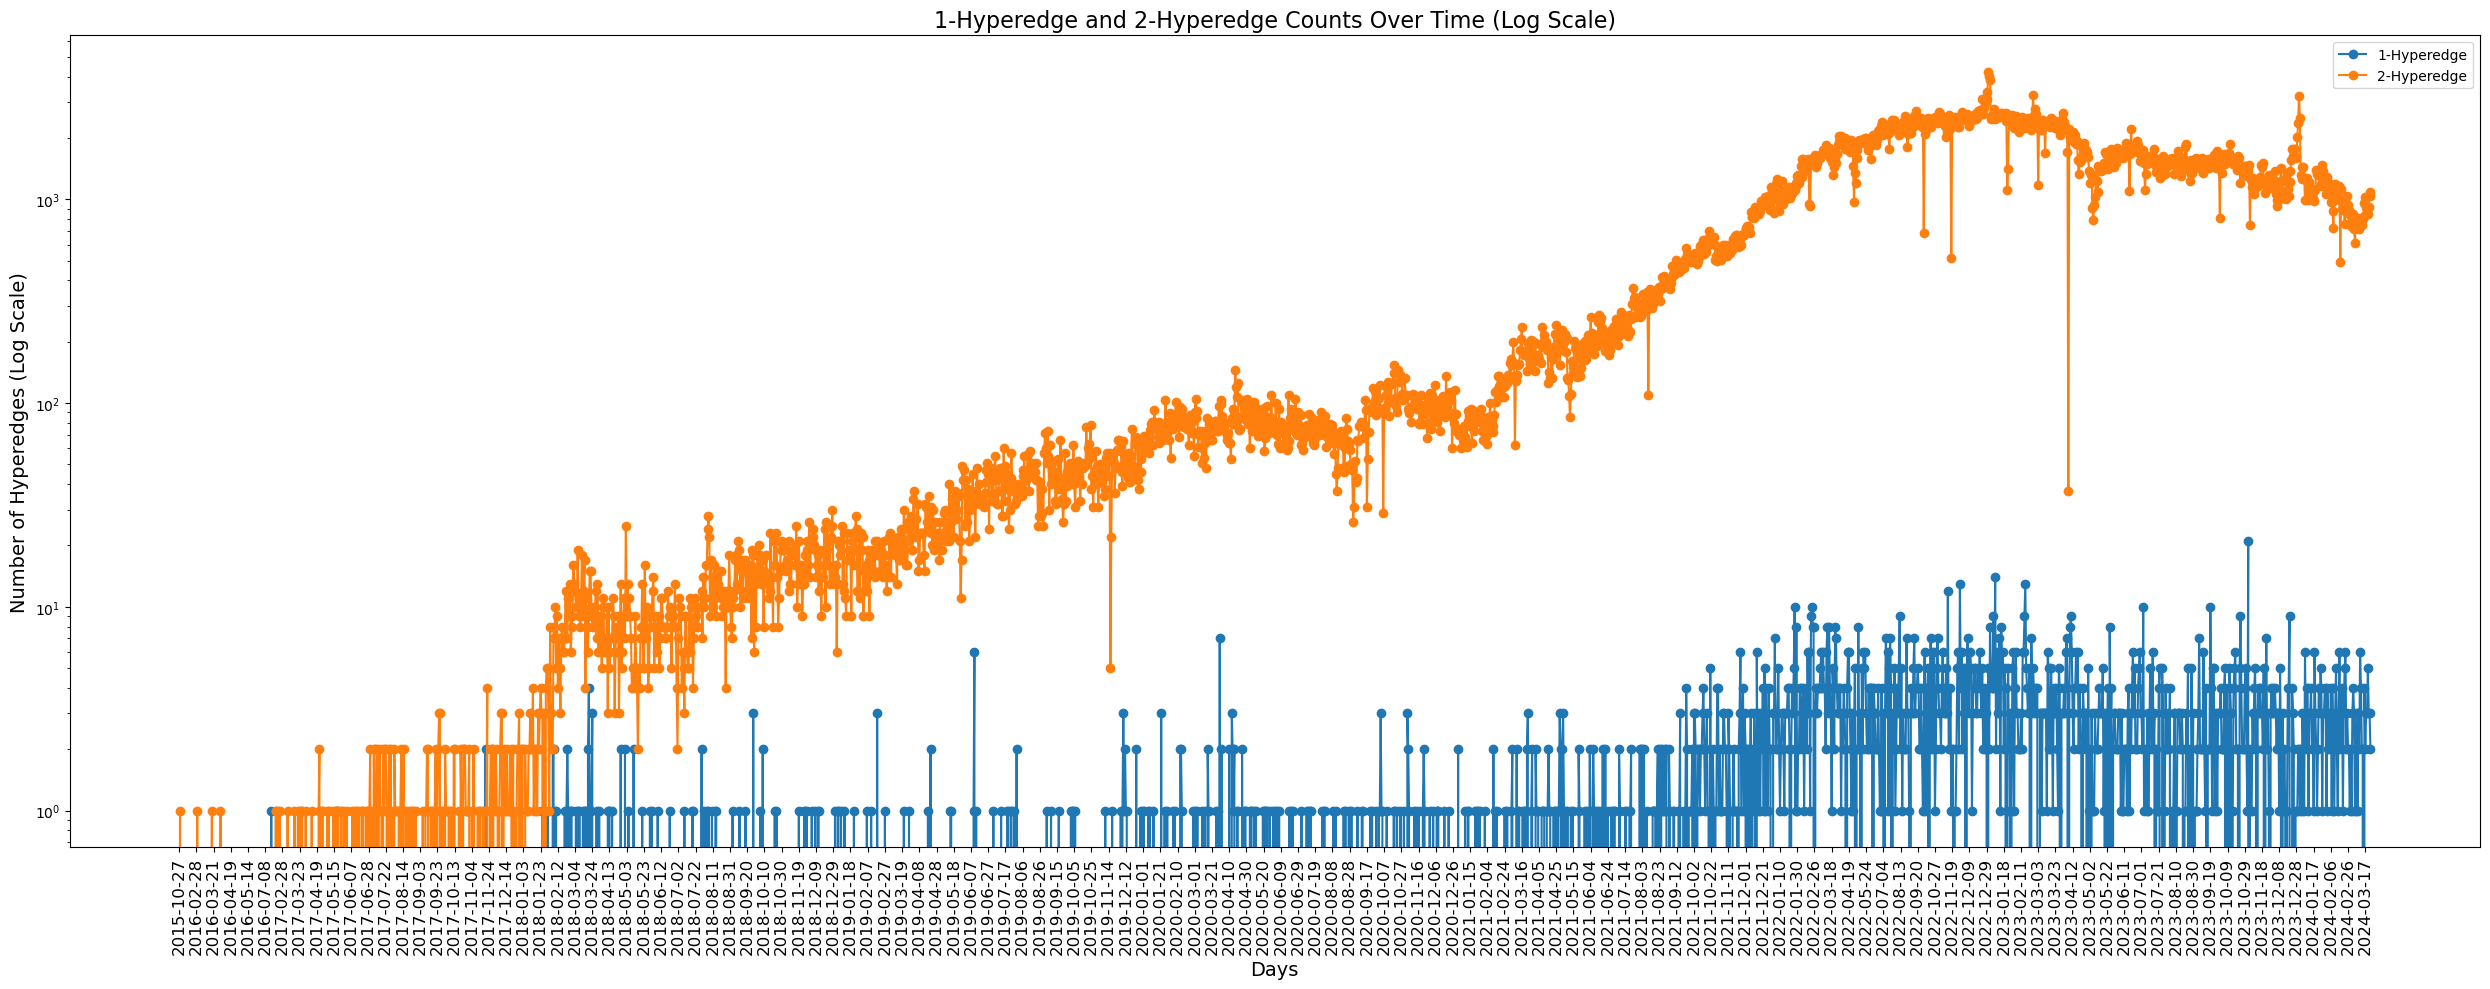

In [1]:
import json
import matplotlib.pyplot as plt
import datetime

# Load the JSON data from the file
with open('/home/prio/loc_project/Mini_2_ERC_721/n-hypergraph/n_hypergraph_count.json', 'r') as file:
    data = json.load(file)

# Convert the dates to a sorted list
dates = sorted(data.keys(), key=lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

# Initialize lists to store the number of 1-hyperedges and 2-hyperedges over time
one_hyperedges = []
two_hyperedges = []

# Extract the count for 1-hyperedges and 2-hyperedges
for date in dates:
    one_hyperedges.append(data[date].get("1", 0))  # Default to 0 if "1" is not present
    two_hyperedges.append(data[date].get("2", 0))  # Default to 0 if "2" is not present

# Generate the plot with the specified settings
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability

# Plot for 1-hyperedges
plt.plot(range(len(dates)), one_hyperedges, marker='o', linestyle='-', color='#1f77b4', label='1-Hyperedge')

# Plot for 2-hyperedges
plt.plot(range(len(dates)), two_hyperedges, marker='o', linestyle='-', color='#ff7f0e', label='2-Hyperedge')

# Add labels and title
plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of Hyperedges (Log Scale)', fontsize=14)
plt.title('1-Hyperedge and 2-Hyperedge Counts Over Time (Log Scale)', fontsize=16)

# Set y-axis to a logarithmic scale
plt.yscale('log')
# 
# Selectively label x-axis ticks
selected_indices = list(range(0, len(dates), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[dates[idx] for idx in selected_indices],  # Set corresponding day names as labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

plt.tight_layout()  # Adjust layout to fit labels

# Add a legend
plt.legend()

# Display the plot
plt.show()


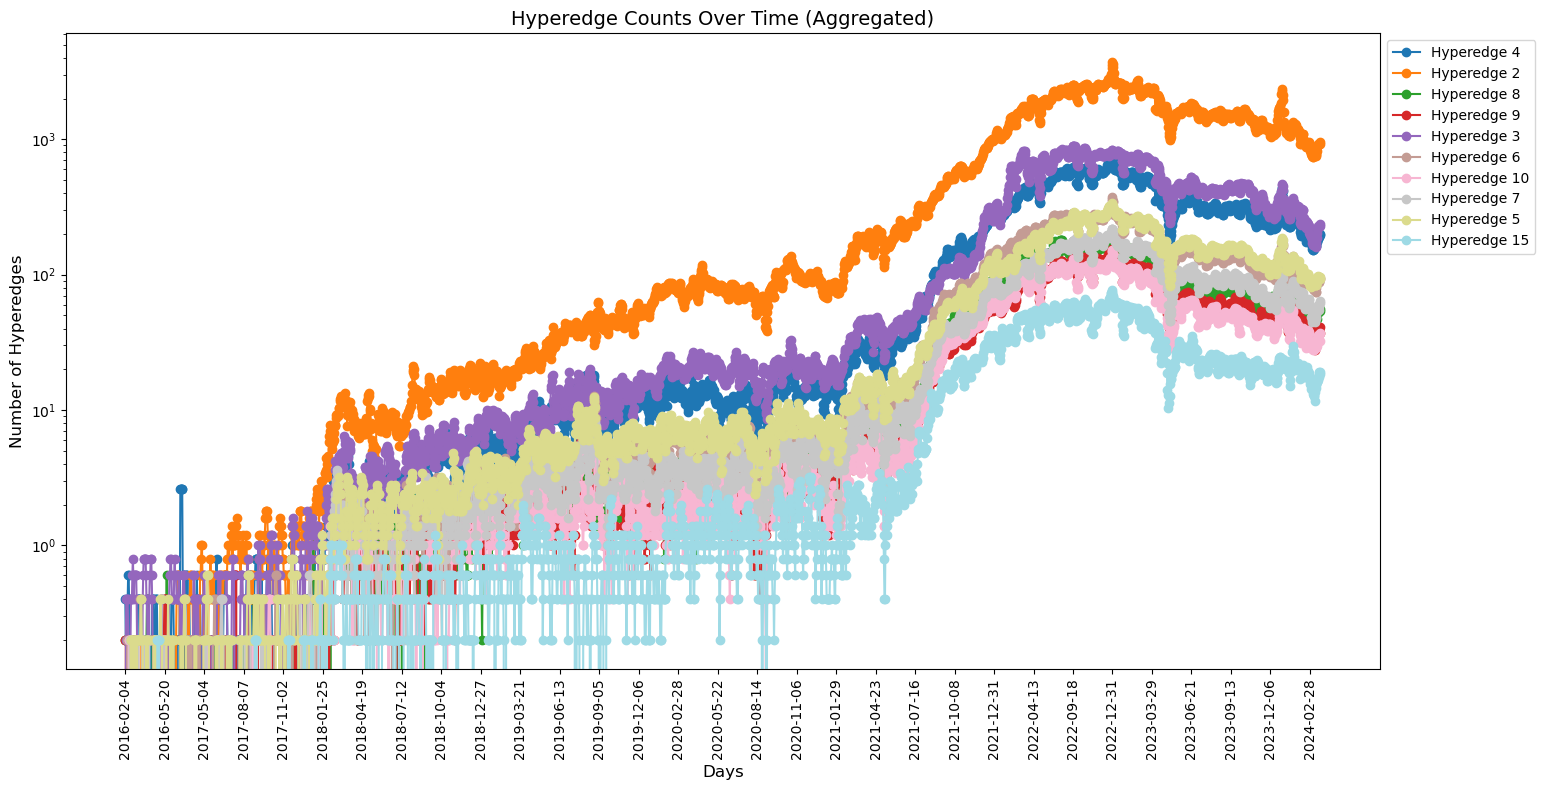

In [13]:
import json
import matplotlib.pyplot as plt
import datetime
import numpy as np

# Load the JSON data from the file
with open('/home/prio/loc_project/Mini_2_ERC_721/n-hypergraph/n_hypergraph_count.json', 'r') as file:
    data = json.load(file)

# Convert the dates to a sorted list
dates = sorted(data.keys(), key=lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

# Initialize a dictionary to store hyperedge counts over time
hyperedge_counts = {}

# Extract the counts for all hyperedges
for date in dates:
    for hyperedge, count in data[date].items():
        if hyperedge not in hyperedge_counts:
            hyperedge_counts[hyperedge] = [0] * len(dates)
        hyperedge_counts[hyperedge][dates.index(date)] = count

# Aggregate data: calculate daily average for each hyperedge
aggregated_counts = {hyperedge: np.convolve(counts, np.ones(5)/5, mode='valid') for hyperedge, counts in hyperedge_counts.items()}
aggregated_dates = dates[2:-2]  # Adjust date range due to averaging

# Limit the number of hyperedges plotted
max_hyperedges = 10  # You can adjust this number to fit your needs
selected_hyperedges = list(aggregated_counts.keys())[:max_hyperedges]

# Generate the plot with adjusted settings
plt.figure(figsize=(14, 8))  # Adjusted figure size for better readability

# Define a color map for hyperedges
colors = plt.cm.get_cmap('tab20', len(selected_hyperedges))  # Using 'tab20' for more colors

# Plot each hyperedge
for i, hyperedge in enumerate(selected_hyperedges):
    plt.plot(range(len(aggregated_dates)), aggregated_counts[hyperedge], marker='o', linestyle='-', color=colors(i % colors.N), label=f'Hyperedge {hyperedge}')

# Add labels and title
plt.xlabel('Days', fontsize=12)
plt.ylabel('Number of Hyperedges', fontsize=12)
plt.title('Hyperedge Counts Over Time (Aggregated)', fontsize=14)

# Set y-axis to a logarithmic scale
plt.yscale('log')

# Adjust x-axis ticks to display more dates
tick_interval = max(1, len(aggregated_dates) // 30)  # Adjust interval to show more dates
plt.xticks(
    ticks=range(0, len(aggregated_dates), tick_interval),
    labels=[aggregated_dates[idx] for idx in range(0, len(aggregated_dates), tick_interval)],
    fontsize=10,
    rotation=90
)

plt.tight_layout()  # Adjust layout to fit labels

# Add a legend with adjusted position
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()


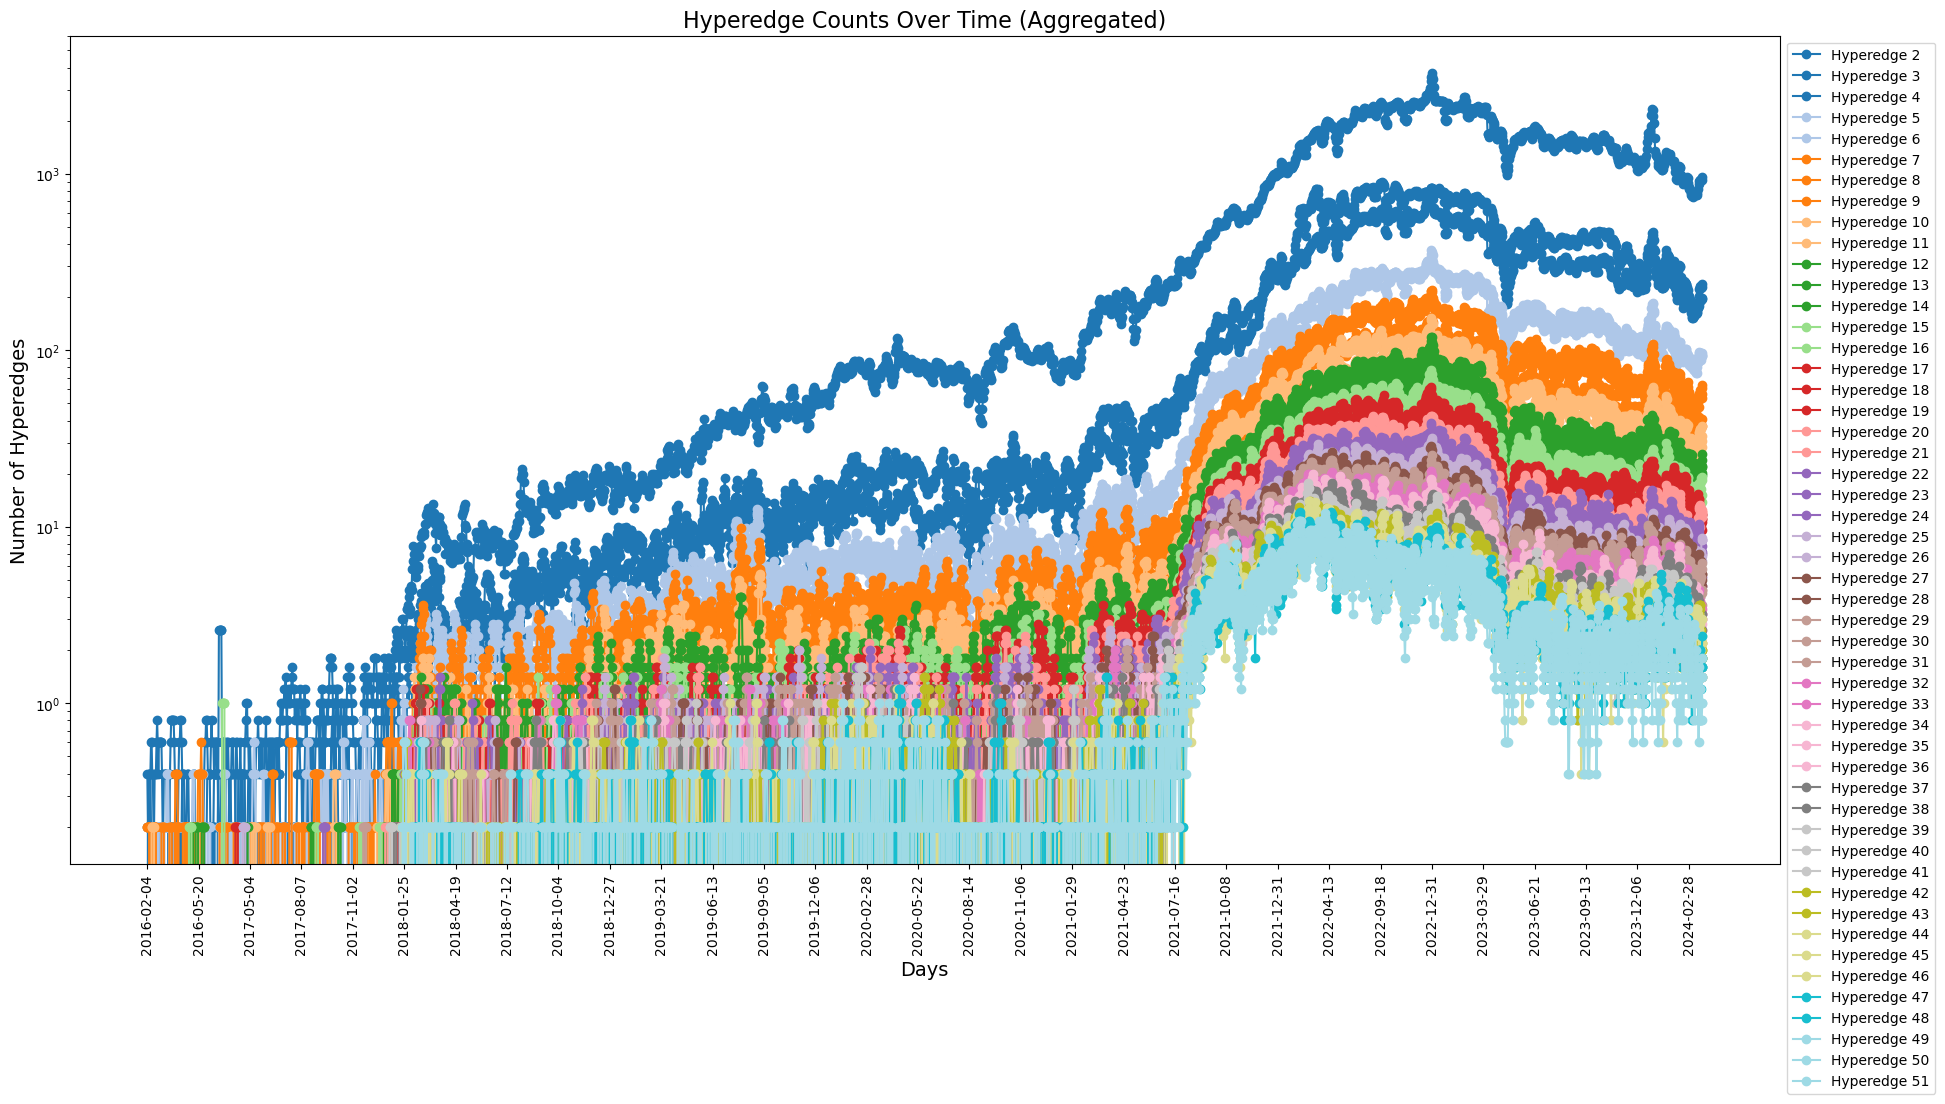

In [14]:
import json
import matplotlib.pyplot as plt
import datetime
import numpy as np

# Load the JSON data from the file
with open('/home/prio/loc_project/Mini_2_ERC_721/n-hypergraph/n_hypergraph_count.json', 'r') as file:
    data = json.load(file)

# Convert the dates to a sorted list
dates = sorted(data.keys(), key=lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

# Initialize a dictionary to store hyperedge counts over time
hyperedge_counts = {}

# Extract the counts for all hyperedges
for date in dates:
    for hyperedge, count in data[date].items():
        if hyperedge not in hyperedge_counts:
            hyperedge_counts[hyperedge] = [0] * len(dates)
        hyperedge_counts[hyperedge][dates.index(date)] = count

# Aggregate data: calculate daily average for each hyperedge
aggregated_counts = {hyperedge: np.convolve(counts, np.ones(5)/5, mode='valid') for hyperedge, counts in hyperedge_counts.items()}
aggregated_dates = dates[2:-2]  # Adjust date range due to averaging

# Sort hyperedges by their total counts to pick a larger subset
sorted_hyperedges = sorted(aggregated_counts.keys(), key=lambda h: sum(aggregated_counts[h]), reverse=True)
max_hyperedges = min(50, len(sorted_hyperedges))  # Adjust this number to plot more hyperedges
selected_hyperedges = sorted_hyperedges[:max_hyperedges]

# Generate the plot with adjusted settings
plt.figure(figsize=(18, 10))  # Larger figure size to accommodate more lines

# Define a color map for hyperedges
colors = plt.cm.get_cmap('tab20', len(selected_hyperedges))  # Using 'tab20' for more colors

# Plot each hyperedge
for i, hyperedge in enumerate(selected_hyperedges):
    plt.plot(range(len(aggregated_dates)), aggregated_counts[hyperedge], marker='o', linestyle='-', color=colors(i % colors.N), label=f'Hyperedge {hyperedge}')

# Add labels and title
plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of Hyperedges', fontsize=14)
plt.title('Hyperedge Counts Over Time (Aggregated)', fontsize=16)

# Set y-axis to a logarithmic scale
plt.yscale('log')

# Adjust x-axis ticks to display more dates
tick_interval = max(1, len(aggregated_dates) // 30)  # Adjust interval to show more dates
plt.xticks(
    ticks=range(0, len(aggregated_dates), tick_interval),
    labels=[aggregated_dates[idx] for idx in range(0, len(aggregated_dates), tick_interval)],
    fontsize=10,
    rotation=90
)

plt.tight_layout()  # Adjust layout to fit labels

# Add a legend with adjusted position
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()


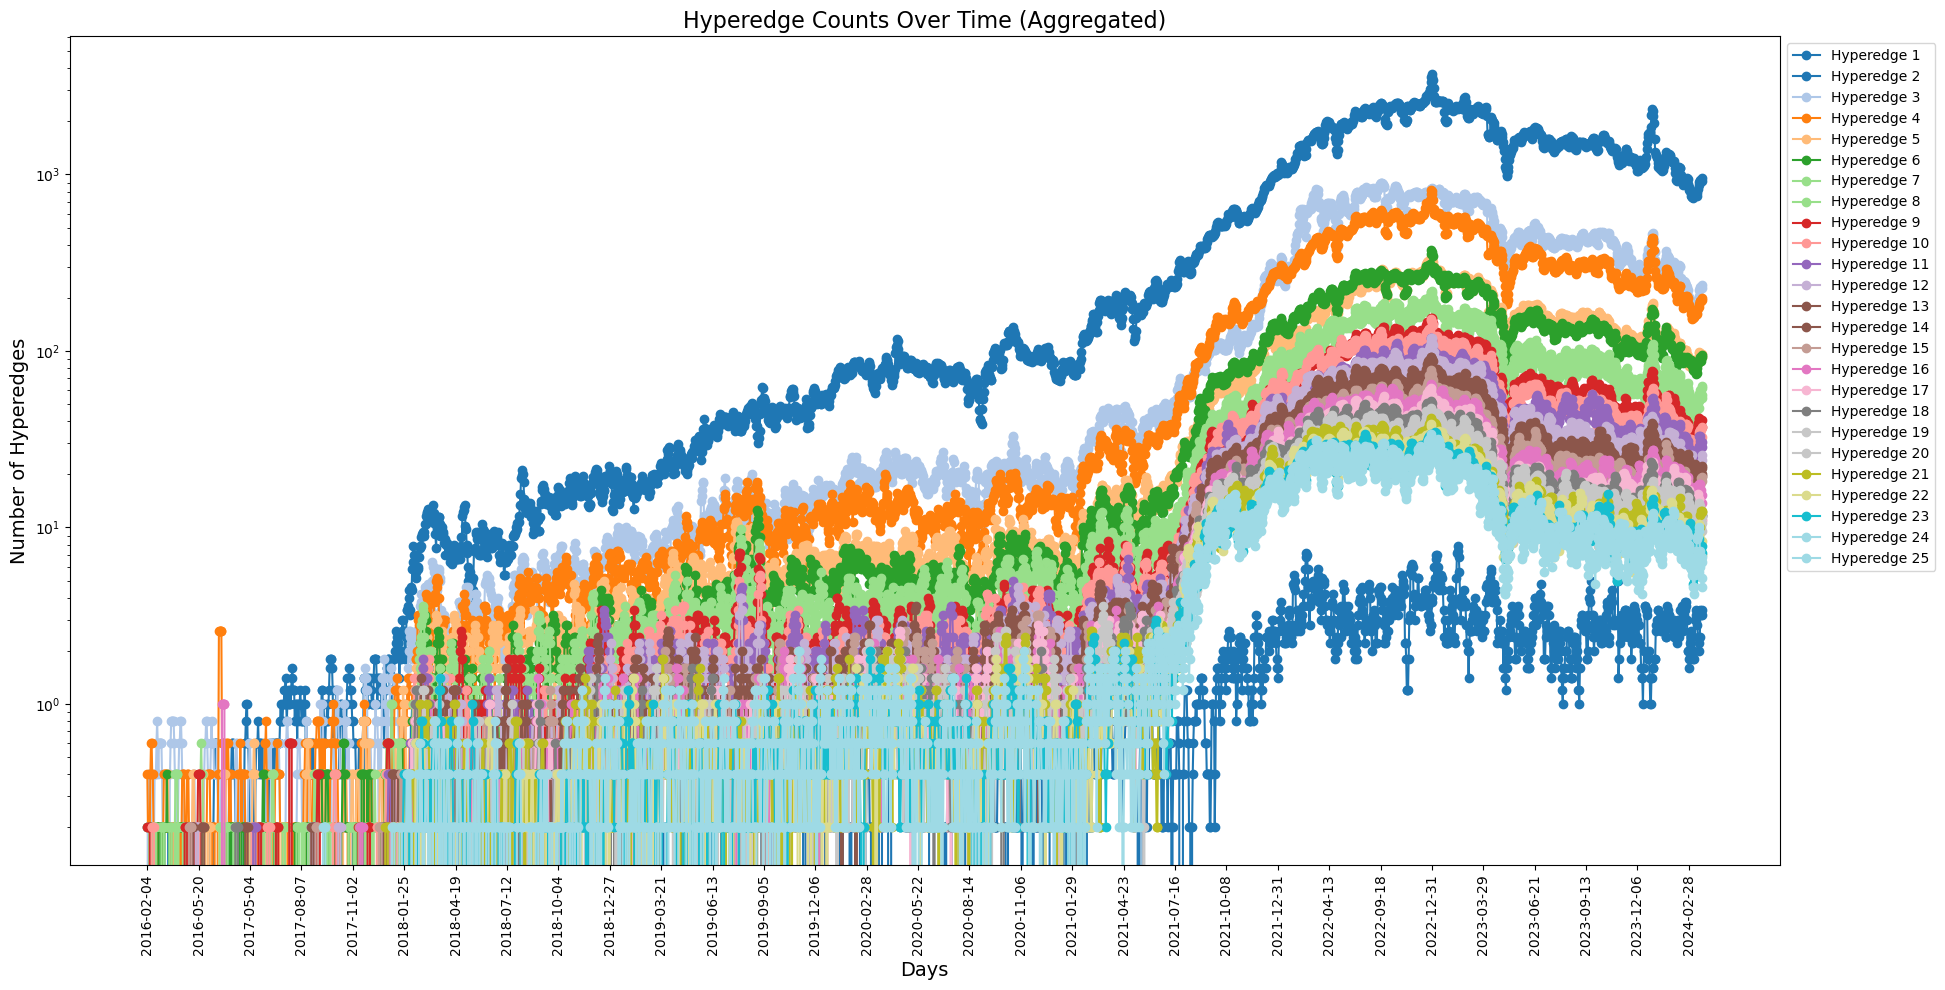

In [19]:
import json
import matplotlib.pyplot as plt
import datetime
import numpy as np

# Load the JSON data from the file
with open('/home/prio/loc_project/Mini_2_ERC_721/n-hypergraph/n_hypergraph_count.json', 'r') as file:
    data = json.load(file)

# Convert the dates to a sorted list
dates = sorted(data.keys(), key=lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

# Initialize a dictionary to store hyperedge counts over time
hyperedge_counts = {}

# Extract the counts for all hyperedges
for date in dates:
    for hyperedge, count in data[date].items():
        if hyperedge not in hyperedge_counts:
            hyperedge_counts[hyperedge] = [0] * len(dates)
        hyperedge_counts[hyperedge][dates.index(date)] = count

# Aggregate data: calculate daily average for each hyperedge
aggregated_counts = {hyperedge: np.convolve(counts, np.ones(5)/5, mode='valid') for hyperedge, counts in hyperedge_counts.items()}
aggregated_dates = dates[2:-2]  # Adjust date range due to averaging

# Filter hyperedges to include only those from 1 to 25
filtered_hyperedges = [str(i) for i in range(1, 26) if str(i) in aggregated_counts]

# Generate the plot with adjusted settings
plt.figure(figsize=(18, 10))  # Adjust figure size to accommodate more lines

# Define a color map for hyperedges
colors = plt.cm.get_cmap('tab20', len(filtered_hyperedges))  # Using 'tab20' for more colors

# Plot each hyperedge in the filtered range
for i, hyperedge in enumerate(filtered_hyperedges):
    plt.plot(range(len(aggregated_dates)), aggregated_counts[hyperedge], marker='o', linestyle='-', color=colors(i % colors.N), label=f'Hyperedge {hyperedge}')

# Add labels and title
plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of Hyperedges', fontsize=14)
plt.title('Hyperedge Counts Over Time (Aggregated)', fontsize=16)

# Set y-axis to a logarithmic scale
plt.yscale('log')

# Adjust x-axis ticks to display more dates
tick_interval = max(1, len(aggregated_dates) // 30)  # Adjust interval to show more dates
plt.xticks(
    ticks=range(0, len(aggregated_dates), tick_interval),
    labels=[aggregated_dates[idx] for idx in range(0, len(aggregated_dates), tick_interval)],
    fontsize=10,
    rotation=90
)

plt.tight_layout()  # Adjust layout to fit labels

# Add a legend with adjusted position
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()


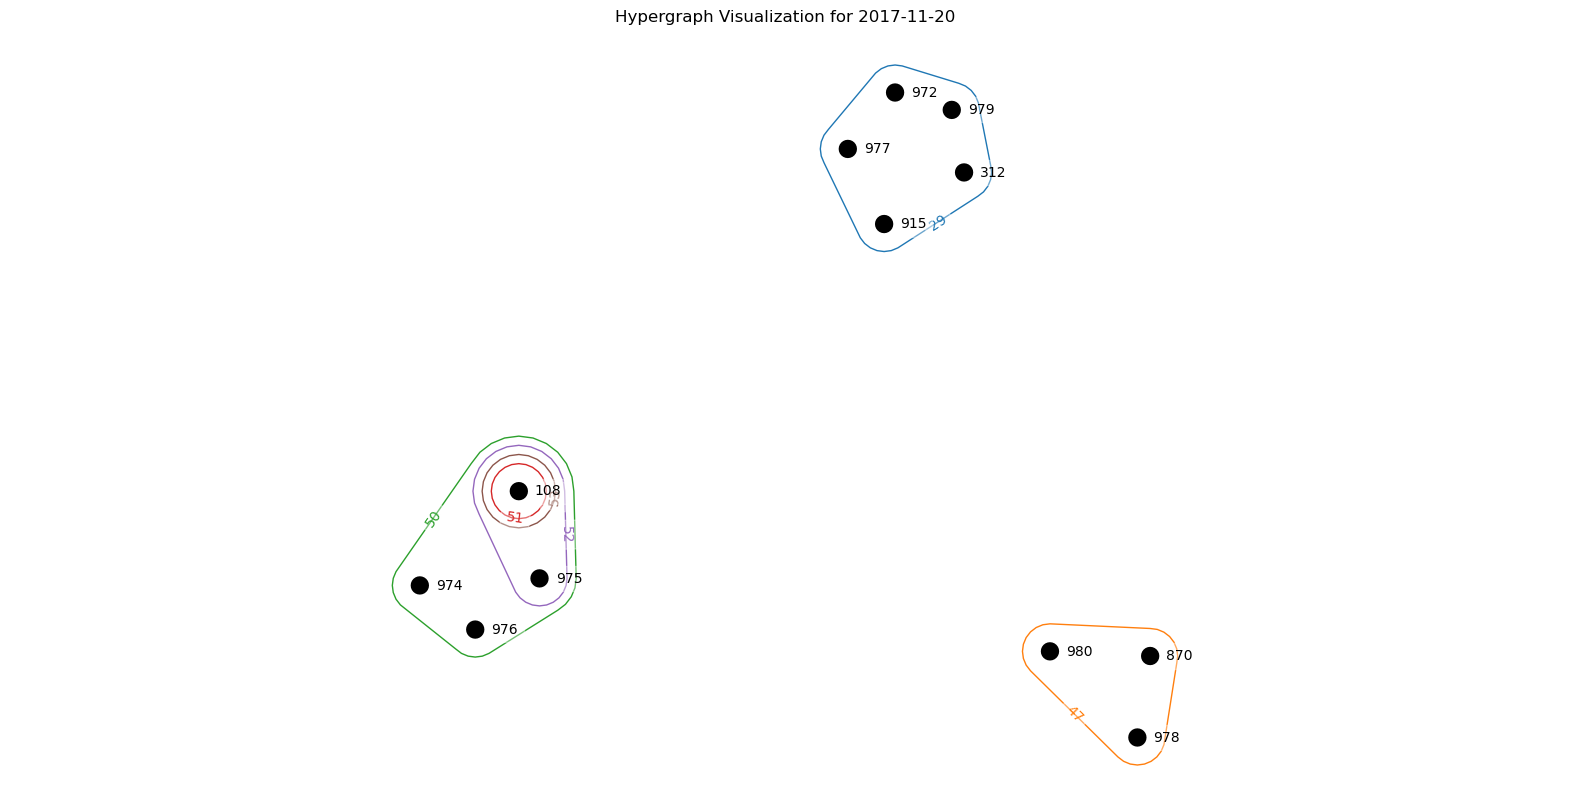

In [24]:
import json
import hypernetx as hnx
import matplotlib.pyplot as plt

# Load the JSON file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/hypergraph_everyday/hypergraph_2017-11-20.json'
with open(file_path, 'r') as f:
    hypergraph_data = json.load(f)

# Create a dictionary where hyperedges are the keys and the values are sets of nodes
hypergraph_dict = {hyperedge: set(nodes) for hyperedge, nodes in hypergraph_data.items()}

# Create a Hypergraph using hypernetx
H = hnx.Hypergraph(hypergraph_dict)

# Plot the hypergraph
plt.figure(figsize=(20, 10))
hnx.draw(H)
plt.title("Hypergraph Visualization for 2017-11-20")
plt.show()

# # Save the hypergraph visualization if needed
# output_path = '/home/prio/loc_project/Mini_2_ERC_721/see_hypergraph/hypergraph_2018-04-01.png'
# plt.savefig(output_path)


In [10]:
import os
import pandas as pd
import hypernetx as hnx
import matplotlib.pyplot as plt

# Paths
input_folder = '/home/prio/loc_project/Mini_2_ERC_721/labelling_out'
output_folder = '/home/prio/loc_project/Mini_2_ERC_721/daily_hypergraph'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get a list of all files in the input folder
file_list = sorted(os.listdir(input_folder))

# Counter to track how many files have been processed
processed_files = 0

for file_name in file_list:
    file_path = os.path.join(input_folder, file_name)
    
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Extract relevant columns (fromLabel, toLabel, tokenAddressLabel)
    df = df[['fromLabel', 'toLabel', 'tokenAddressLabel']]
    
    # Create a dictionary to store hyperedges (key: tokenAddressLabel, value: set of nodes)
    hypergraph_dict = {}
    
    for _, row in df.iterrows():
        token = row['tokenAddressLabel']
        from_label = row['fromLabel']
        to_label = row['toLabel']
        
        if token not in hypergraph_dict:
            hypergraph_dict[token] = set()
        
        # Add the 'from' and 'to' labels as nodes to the corresponding token's hyperedge
        hypergraph_dict[token].update([from_label, to_label])
    
    # Create a Hypergraph using hypernetx
    H = hnx.Hypergraph(hypergraph_dict)
    
    # Plot the hypergraph without node and edge labels, decrease node size
    plt.figure(figsize=(20, 10))
    
    # Customize node size and remove labels
    hnx.draw(H, with_node_labels=False, with_edge_labels=False , node_radius=0.5)
    
    # Extract the date from the file name and use it as the title
    date_str = file_name.replace('.csv', '')  # Assuming the file name contains the date
    plt.title(f"Hypergraph Visualization for {date_str}")

    # Save the plot
    output_path = os.path.join(output_folder, f'hypergraph_{date_str}.png')
    plt.savefig(output_path, bbox_inches='tight')  # Save without extra padding
    
    # Clear the figure after saving to prevent overlap in the next iteration
    plt.clf()
    
    # Increment the counter and print the progress
    processed_files += 1
    print(f"Processed {processed_files}/{len(file_list)} files.")

print(f"All {processed_files} files processed and hypergraph visualizations saved.")


Processed 1/2547 files.
Processed 2/2547 files.
Processed 3/2547 files.
Processed 4/2547 files.
Processed 5/2547 files.
Processed 6/2547 files.
Processed 7/2547 files.
Processed 8/2547 files.
Processed 9/2547 files.
Processed 10/2547 files.
Processed 11/2547 files.
Processed 12/2547 files.
Processed 13/2547 files.
Processed 14/2547 files.
Processed 15/2547 files.
Processed 16/2547 files.
Processed 17/2547 files.
Processed 18/2547 files.
Processed 19/2547 files.
Processed 20/2547 files.


/tmp/ipykernel_320581/2472658078.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 10))


Processed 21/2547 files.
Processed 22/2547 files.
Processed 23/2547 files.
Processed 24/2547 files.
Processed 25/2547 files.
Processed 26/2547 files.
Processed 27/2547 files.
Processed 28/2547 files.
Processed 29/2547 files.
Processed 30/2547 files.
Processed 31/2547 files.
Processed 32/2547 files.
Processed 33/2547 files.
Processed 34/2547 files.
Processed 35/2547 files.
Processed 36/2547 files.
Processed 37/2547 files.
Processed 38/2547 files.
Processed 39/2547 files.
Processed 40/2547 files.
Processed 41/2547 files.
Processed 42/2547 files.
Processed 43/2547 files.
Processed 44/2547 files.
Processed 45/2547 files.
Processed 46/2547 files.
Processed 47/2547 files.
Processed 48/2547 files.
Processed 49/2547 files.
Processed 50/2547 files.
Processed 51/2547 files.
Processed 52/2547 files.
Processed 53/2547 files.
Processed 54/2547 files.
Processed 55/2547 files.
Processed 56/2547 files.
Processed 57/2547 files.
Processed 58/2547 files.
Processed 59/2547 files.
Processed 60/2547 files.


# Plot_key-Counts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/key_counts.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Print column names to verify they are correct
print(df.columns)

# Assuming the column names are 'k-hypergraph' and 'frequency'
keys_column_name = 'k-hypergraph'  # Update this if the column name is different
frequency_column_name = 'frequency'  # Update this if the column name is different

# Sort data by 'k-hypergraph' for proper plotting
df.sort_values(by=keys_column_name, inplace=True)

# Create an index for the x-axis (based on k-hypergraph)
keys_index = np.arange(len(df))  # Index based on the number of keys

# Plotting the line graph for k-hypergraph (Keys) vs Frequency
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(keys_index, df[frequency_column_name].values, marker='o', linestyle='-', color='b', label='Frequency')

# Set a dynamic step size for x-ticks to prevent overlap
num_keys = len(df)
if num_keys > 10:
    step_size = max(1, num_keys // 10)  # Display about 10 x-ticks
else:
    step_size = 1  # If there are fewer keys, display all

# Set x-axis ticks and labels with k-hypergraph values
selected_indices = list(range(0, len(df), step_size))  # Select indices spaced by step_size

plt.xticks(
    ticks=selected_indices,
    labels=df[keys_column_name].iloc[selected_indices].astype(str),  # Convert keys to string for proper display
    rotation=45,  # Rotate labels for better readability
    fontsize=18,
    fontweight='bold'  # Set the font to bold
)

# Set y-axis tick font weight
plt.yticks(fontweight='bold',fontsize=18)

# Set labels and title
plt.xlabel('k-hypergraph (Keys)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('k-hypergraph (Keys) vs Frequency', fontsize=16, fontweight='bold')

# Set y-axis to logarithmic scale for better visualization
plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/home/prio/loc_project/Mini_2_ERC_721/csv_data/key_counts.csv'

Index(['k-hypergraph', 'frequency'], dtype='object')


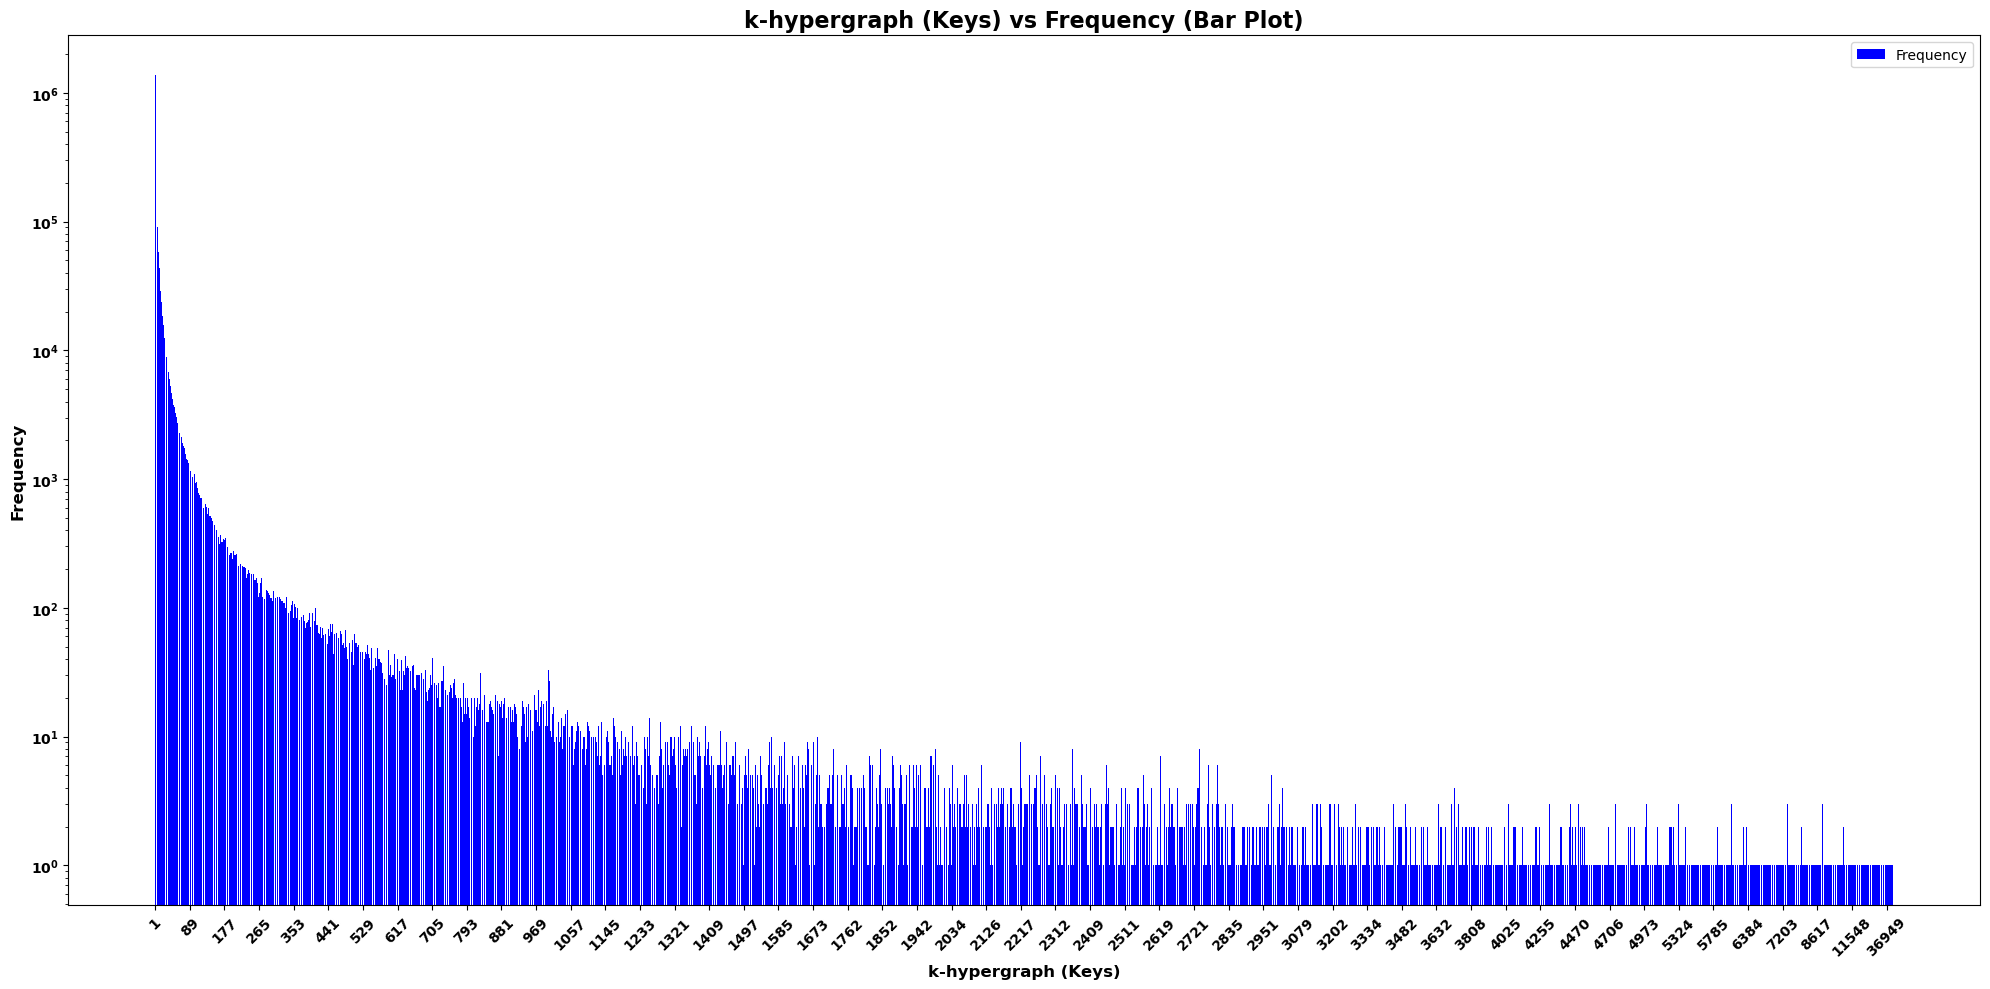

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/key_counts.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Print column names to verify they are correct
print(df.columns)

# Assuming the column names are 'k-hypergraph' and 'frequency'
keys_column_name = 'k-hypergraph'  # Update this if the column name is different
frequency_column_name = 'frequency'  # Update this if the column name is different

# Sort data by 'k-hypergraph' for proper plotting
df.sort_values(by=keys_column_name, inplace=True)

# Create an index for the x-axis (based on k-hypergraph)
keys_index = np.arange(len(df))  # Index based on the number of keys

# Plotting the bar graph for k-hypergraph (Keys) vs Frequency
plt.figure(figsize=(20, 10))  # Set figure size
plt.bar(keys_index, df[frequency_column_name].values, color='b', label='Frequency')

# Set a dynamic step size for x-ticks to prevent overlap
num_keys = len(df)
if num_keys > 50:
    step_size = max(1, num_keys // 50)  # Display about 10 x-ticks
else:
    step_size = 1  # If there are fewer keys, display all

# Set x-axis ticks and labels with k-hypergraph values
selected_indices = list(range(0, len(df), step_size))  # Select indices spaced by step_size

plt.xticks(
    ticks=selected_indices,
    labels=df[keys_column_name].iloc[selected_indices].astype(str),  # Convert keys to string for proper display
    rotation=45,  # Rotate labels for better readability
    fontsize=10,
    fontweight='bold'  # Set the font to bold
)

# Set y-axis tick font weight
plt.yticks(fontweight='bold')

# Set labels and title
plt.xlabel('k-hypergraph (Keys)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('k-hypergraph (Keys) vs Frequency (Bar Plot)', fontsize=16, fontweight='bold')

# Set y-axis to logarithmic scale for better visualization
plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()
